# **Linear Regression Assignment for Bike sharing**

 1. **Importing Required Libraries for the Assignment**

In [1]:
# For Data Processing
import pandas as pd
import numpy as np

# For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For Machine Learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [113]:
sklearn. __version__

'0.24.2'

2. **Importing the required dataset (day.csv) into the Jupyter Notebook**

In [2]:
bikedata = pd.read_csv('day.csv')

3. **Reading the top 5 Rows of the dataset**

In [3]:
bikedata.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

4. **Getting the Shape of the dataset**

In [4]:
bikedata.shape

(730, 16)

5. **Getting the Info about the dataset**

In [5]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


6. **Getting to know if any null values are there in the dataset**

In [6]:
bikedata.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

7. **Describing the dataset**

In [7]:
bikedata.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

8. **Plotting a pairplot for pairwise relationships(All Variables) in the dataset**

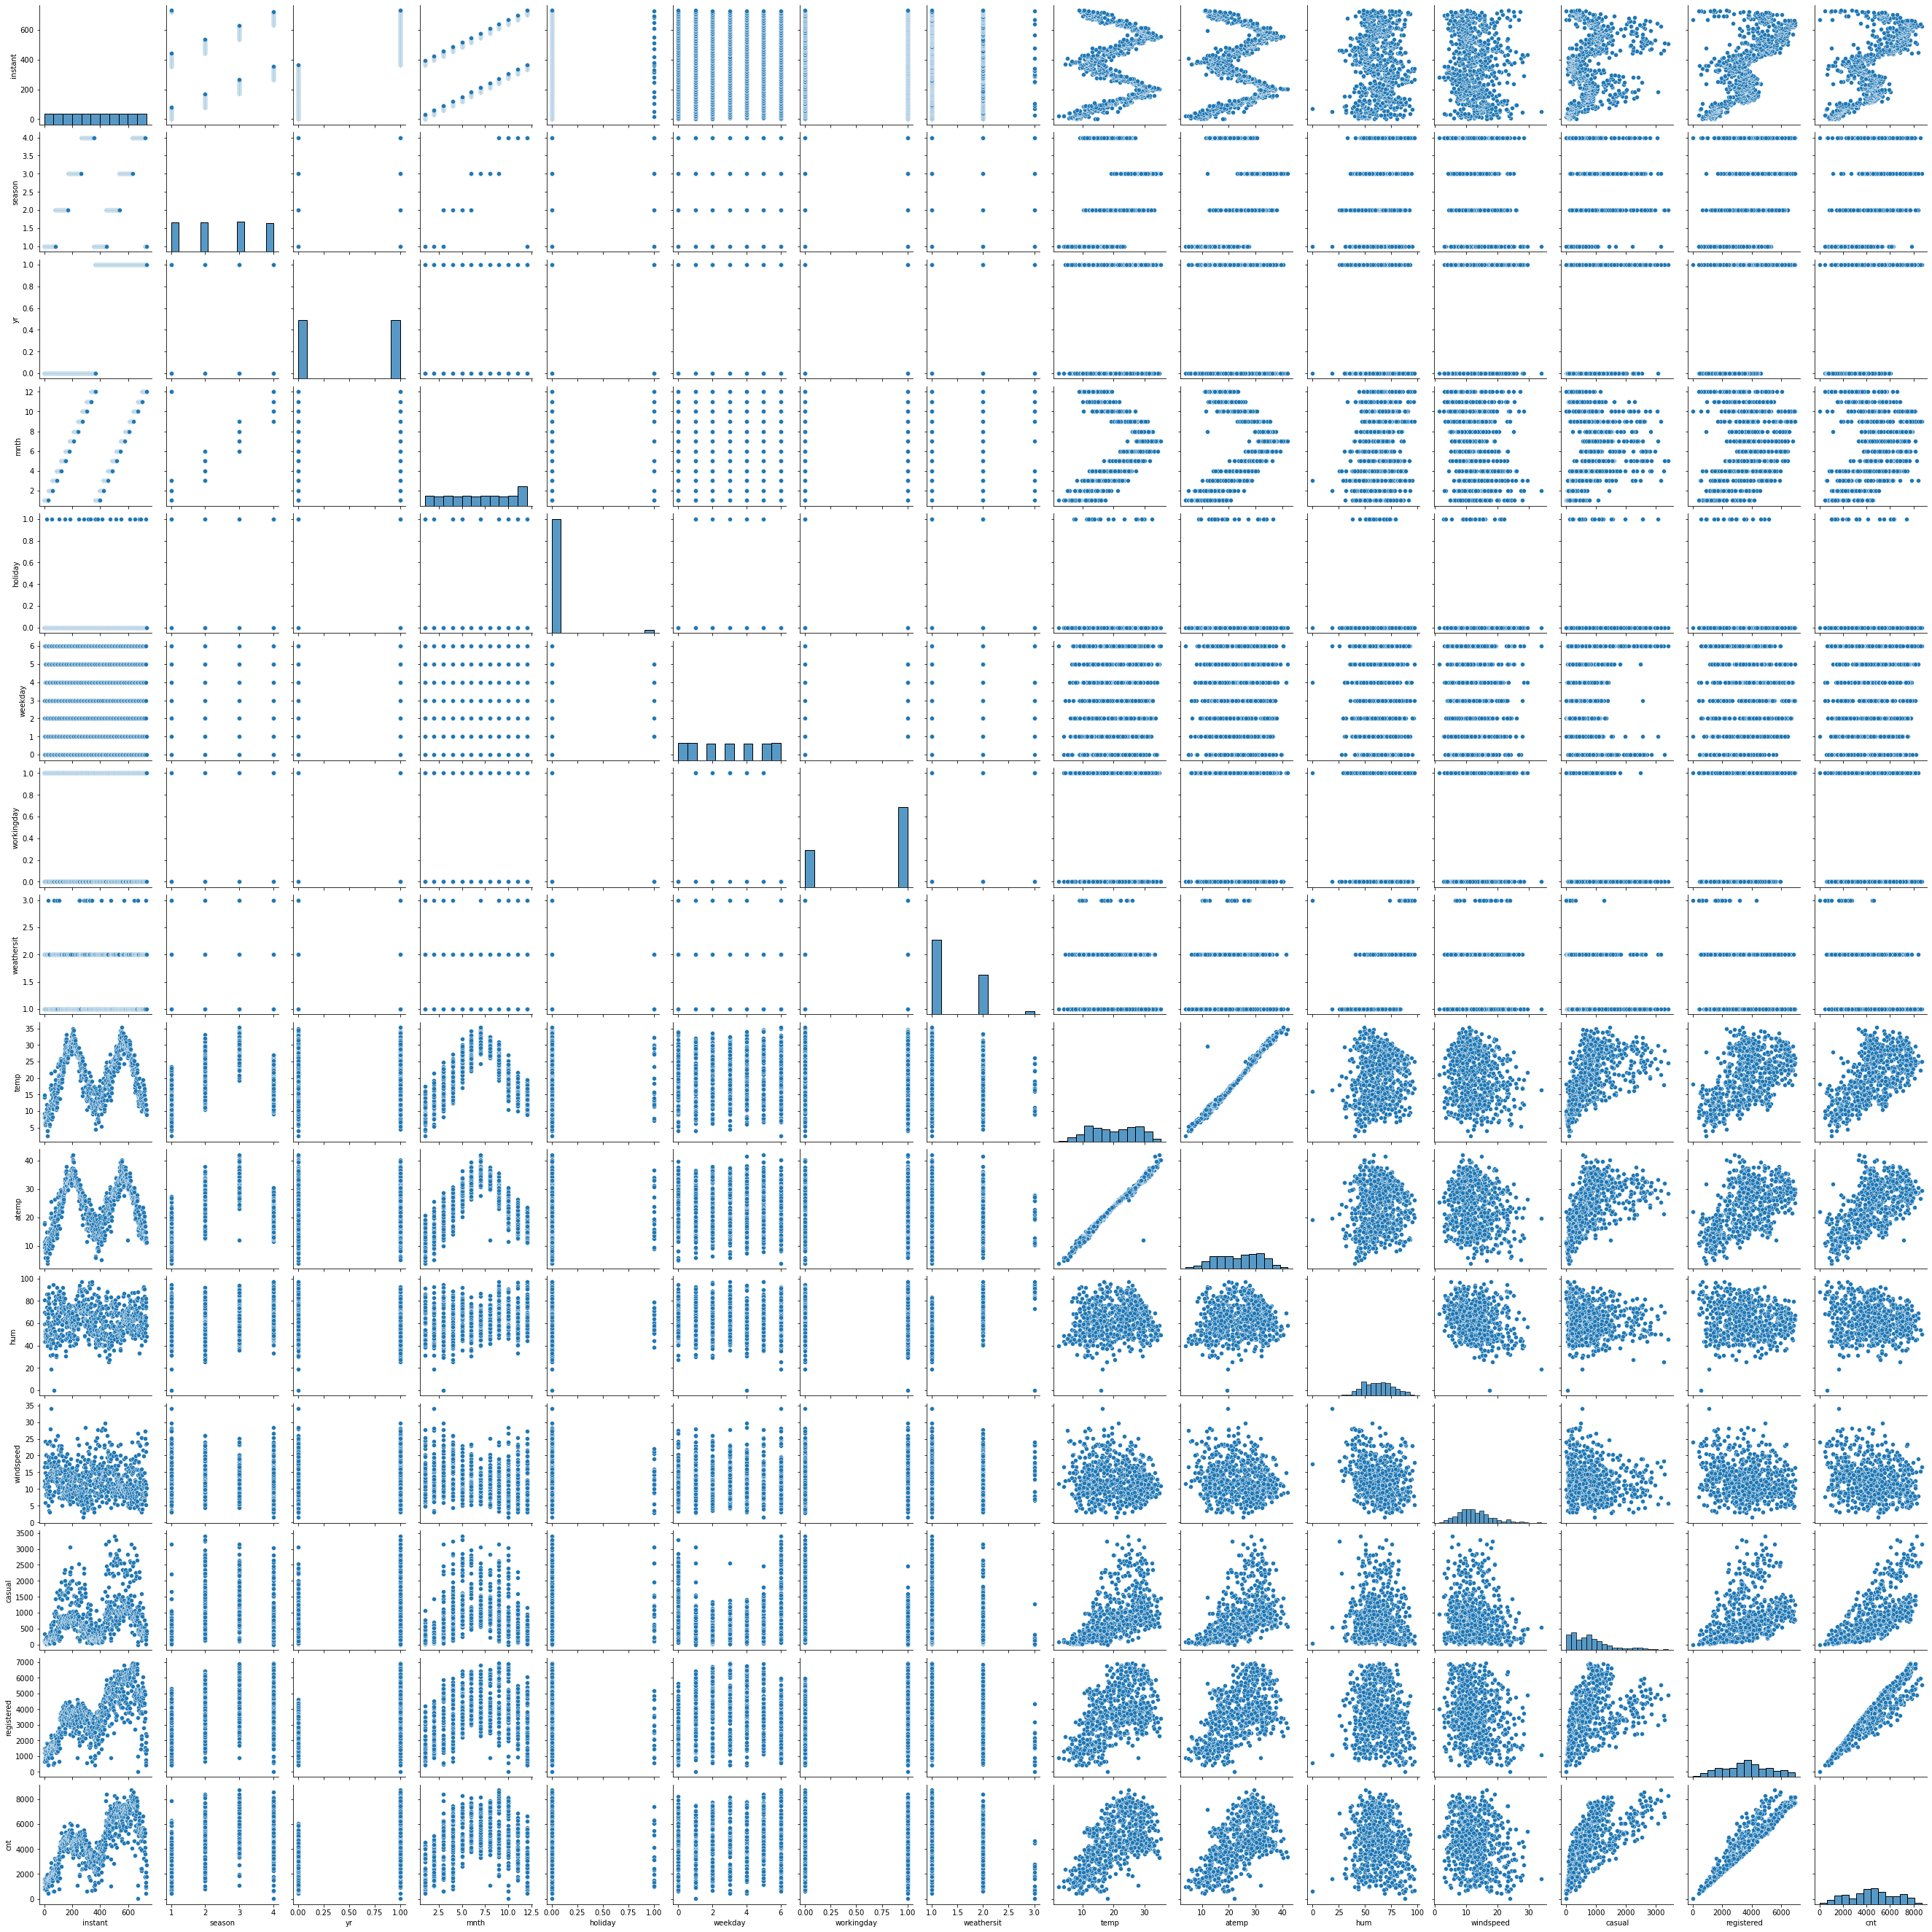

In [8]:
sns.pairplot(bikedata)
plt.show()

9. **Getting the list of columns from the dataset**

In [9]:
bikedata.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

10. **Dropping the unnecessary columns**

In [10]:
bikedata = bikedata.drop(['instant','dteday','casual','registered'],axis=1)

11. **Checking the dataset after dropping the unnecessary columns**

In [11]:
bikedata.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

12. **Checking the value_counts() function for "Season" variable**

In [12]:
bikedata["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

13. **Changing the values for "Season" variable into categorical values as described in the readme file**
#### - season : season (1:spring, 2:summer, 3:fall, 4:winter)

In [13]:
bikedata["season"] = bikedata["season"].astype('str').map({'1':'Spring', '2':'Summer', '3':'Fall', '4':'Winter'})

14. **Checking the value_counts() function for "mnth" variable**

In [14]:
bikedata["mnth"].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

15. **Changing the values for "mnth" variable into categorical values as described in the readme file**
#### - mnth : month ( 1 to 12)

In [15]:
bikedata["mnth"] = bikedata["mnth"].astype('str').map({'1':'Jan', '2':'Feb', '3':'Mar', '4':'Apr', '5':'May', '6':'Jun', '7':'Jul', '8':'Aug', '9':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'})

16. **Checking the value_counts() function for "weekday" variable**

In [16]:
bikedata["weekday"].value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

17. **Changing the values for "weekday" variable into categorical values as described in the readme file**
#### - weekday : day of the week

In [17]:
bikedata["weekday"] = bikedata["weekday"].astype('str').map({'1':'Mon', '2':'Tue', '3':'Wed', '4':'Thu', '5':'Fri', '6':'Sat', '0':'Sun'})


18. **Creating a new variable "Weekend" from weekday column by using mapping method**

In [18]:
#bikedata["weekend"] = bikedata["weekday"].map({'Mon':0, 'Tue':0, 'Wed':0, 'Thu':0, 'Fri':0, 'Sat':1, 'Sun':1})

# Dropping this variable as already saturday and sunday are added as dummy variables from weekday column.

19. **Checking the value_counts() function for "weathersit" variable**

In [19]:
bikedata["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

20. **Changing the values for "weathersit" variable into categorical values as described in the readme file**
+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [20]:
bikedata["weathersit"] = bikedata["weathersit"].astype('str').map({'1':'Clear', '2':'Cloudy', '3':'Rainy', '4':'Storm'})

21. **Rounding off the numerical variables in the dataset upto 4 places for understanding**

In [21]:
bikedata['temp'] = bikedata['temp'].round(4)
bikedata['atemp'] = bikedata['atemp'].round(4)
bikedata['hum'] = bikedata['hum'].round(4)
bikedata['windspeed'] = bikedata['windspeed'].round(4)

22. **Getting the top 5 rows of the dataset after preprocessing**

In [22]:
bikedata.head()

season  yr mnth  holiday weekday  workingday weathersit     temp    atemp  \
0  Spring   0  Jan        0     Sat           0     Cloudy  14.1108  18.1812   
1  Spring   0  Jan        0     Sun           0     Cloudy  14.9026  17.6870   
2  Spring   0  Jan        0     Mon           1      Clear   8.0509   9.4702   
3  Spring   0  Jan        0     Tue           1      Clear   8.2000  10.6061   
4  Spring   0  Jan        0     Wed           1      Clear   9.3052  11.4635   

       hum  windspeed   cnt  
0  80.5833    10.7499   985  
1  69.6087    16.6521   801  
2  43.7273    16.6367  1349  
3  59.0435    10.7398  1562  
4  43.6957    12.5223  1600

23. **Plotting a pairplot for pairwise relationships(All Variables) in the dataset after preprocessing**

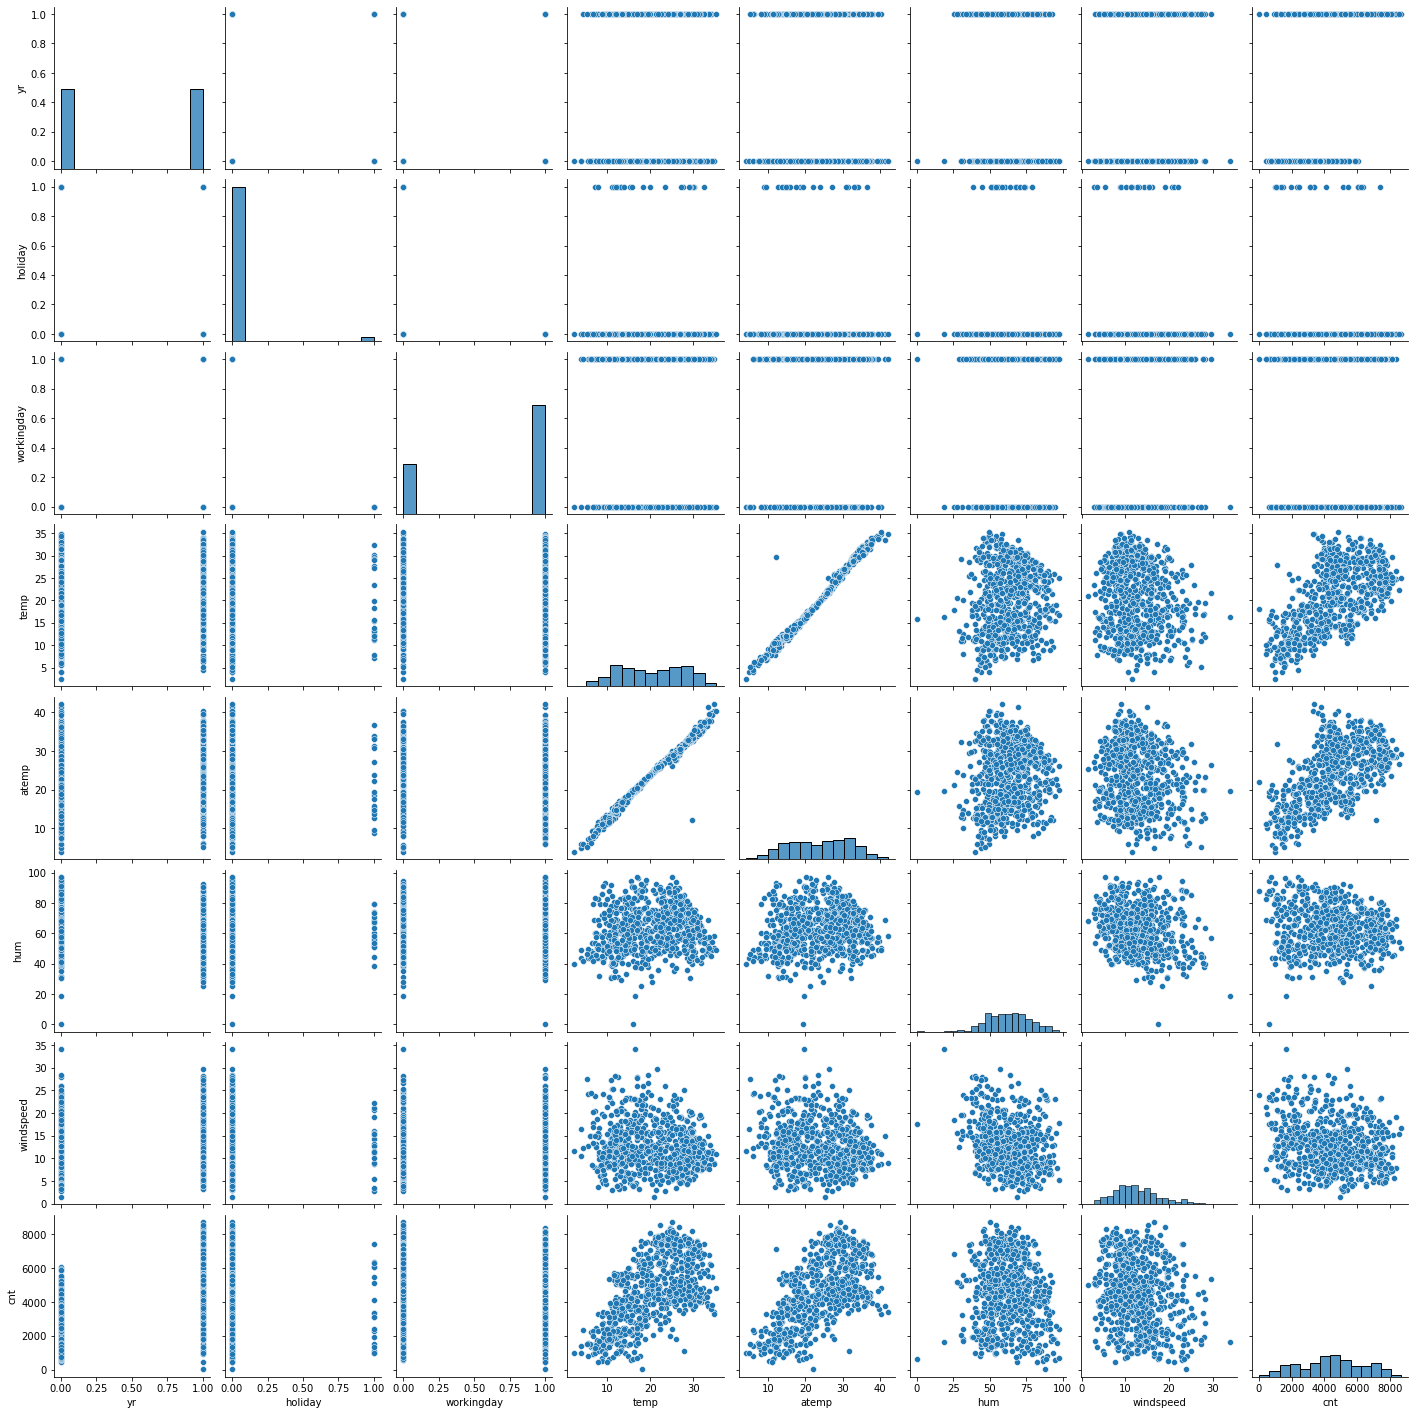

In [23]:
sns.pairplot(bikedata)
plt.show()

24. **Dividing the numerical and categorical coulmns in the dataset**

In [24]:
numerical_columns=['temp','atemp','hum','windspeed']
categorical_columns=['season','yr','mnth','holiday','weekday','weekend','workingday','weathersit']

25. **Plotting a pairplot for numerical columns against target variable('cnt)**

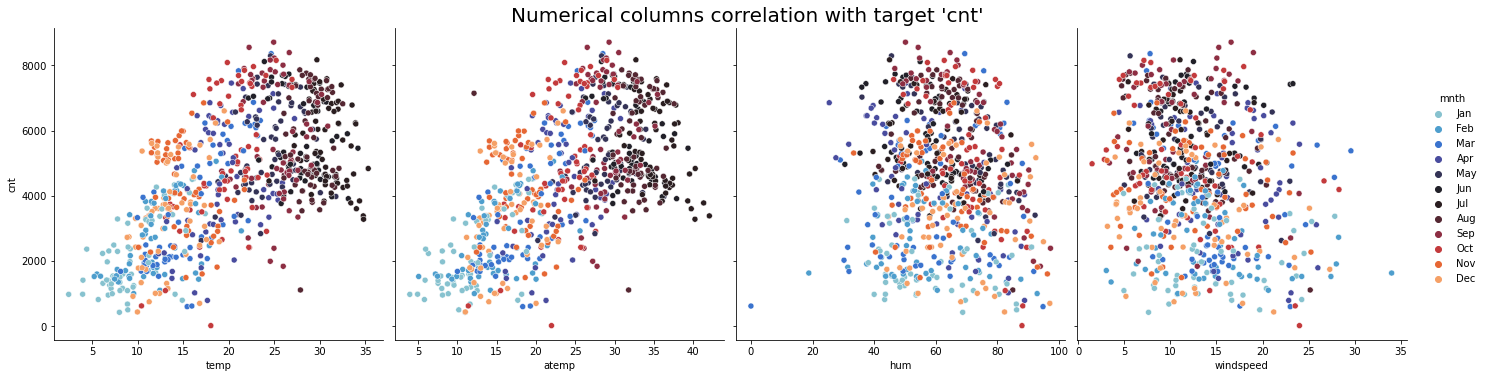

In [25]:
sns.pairplot(x_vars = numerical_columns, y_vars=['cnt'], data=bikedata, diag_kind='kde',hue='mnth',palette='icefire',size=5 )
plt.title("Numerical columns correlation with target 'cnt'",fontsize=20,color='black',x=-1.0)
plt.show()

26. **Plotting a pairplot aganist numerical columns in the dataset**

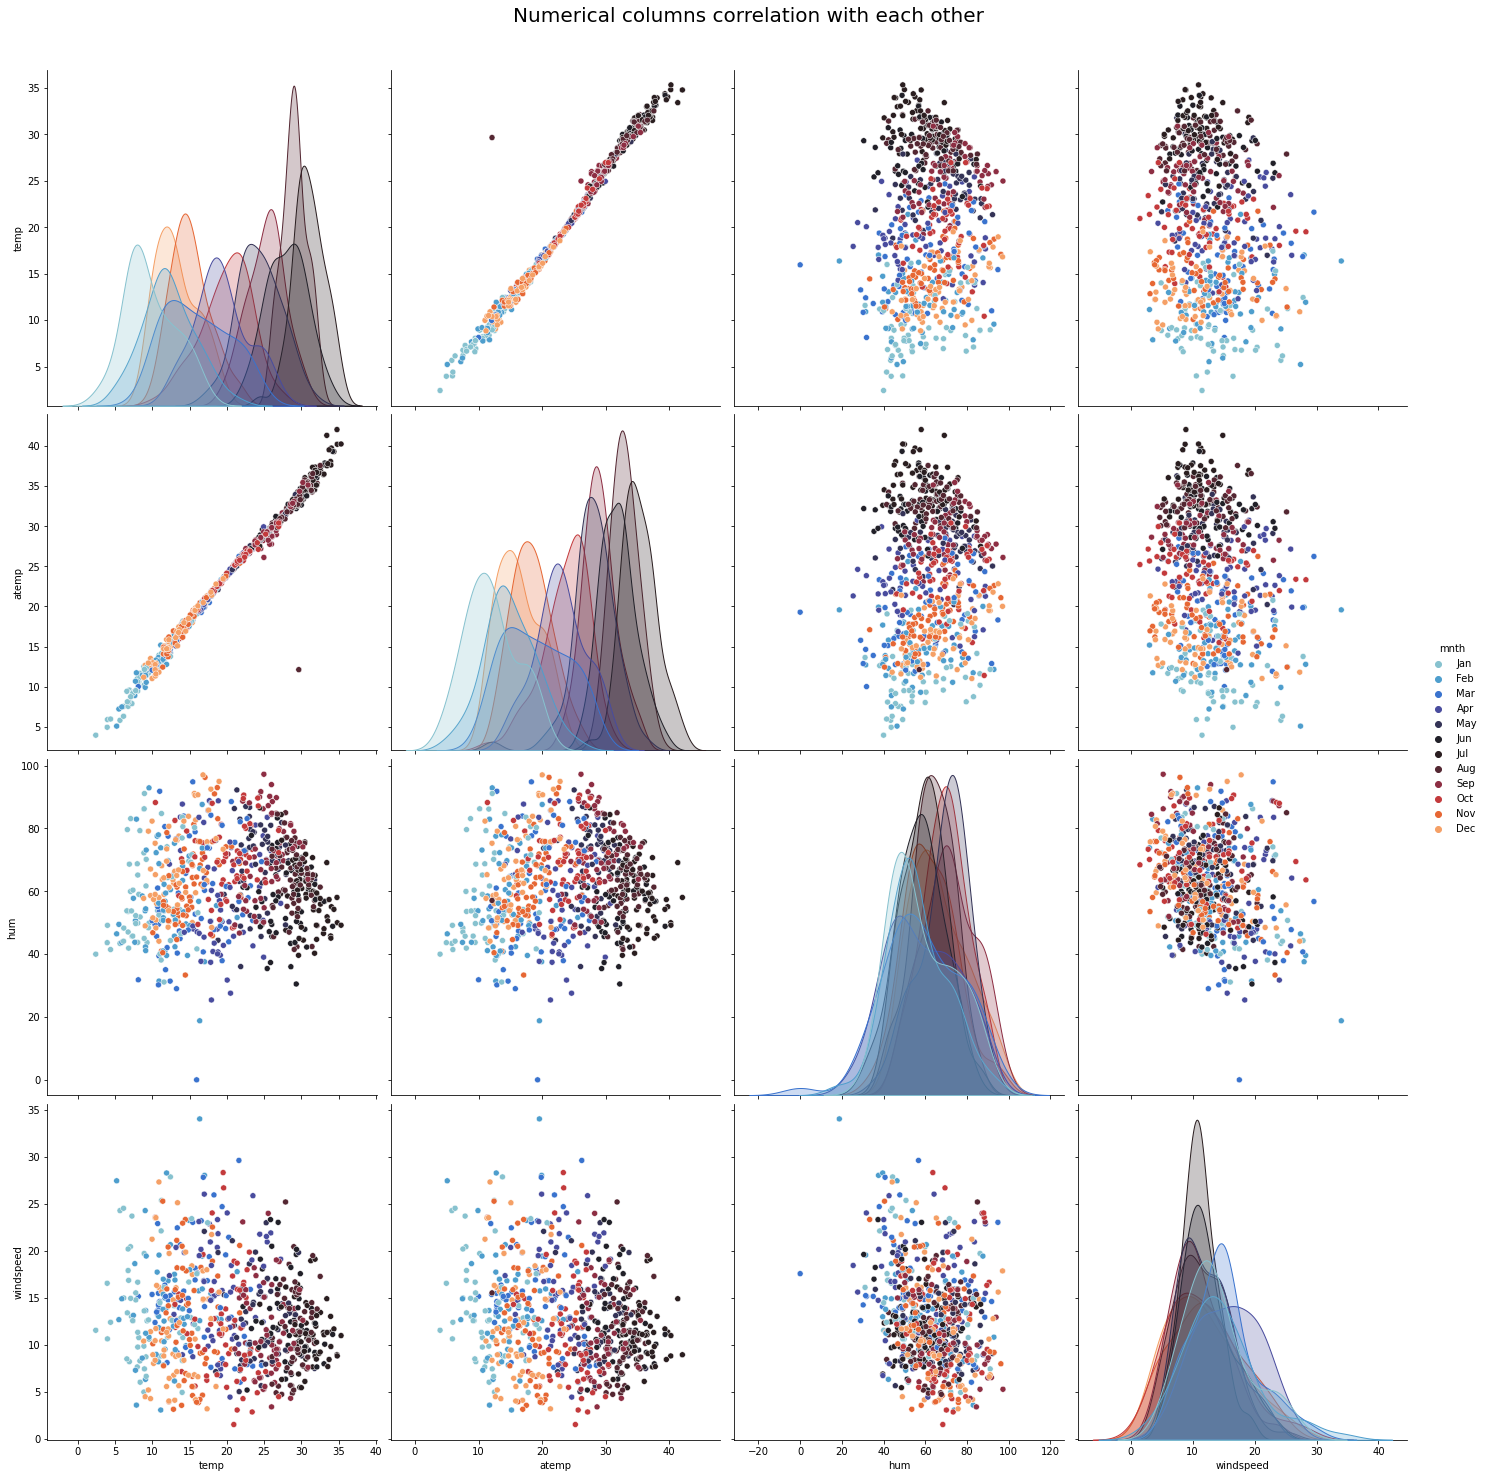

In [26]:
sns.pairplot(x_vars = numerical_columns, y_vars=numerical_columns, data=bikedata, diag_kind='kde',hue='mnth',palette='icefire',size=5 )
plt.title("Numerical columns correlation with each other",fontsize=20,color='black',x=-1.0,y=4.2)
plt.show()

27. **Plotting subplots for all the categorical columns in the dataset aganist target variable("cnt")**

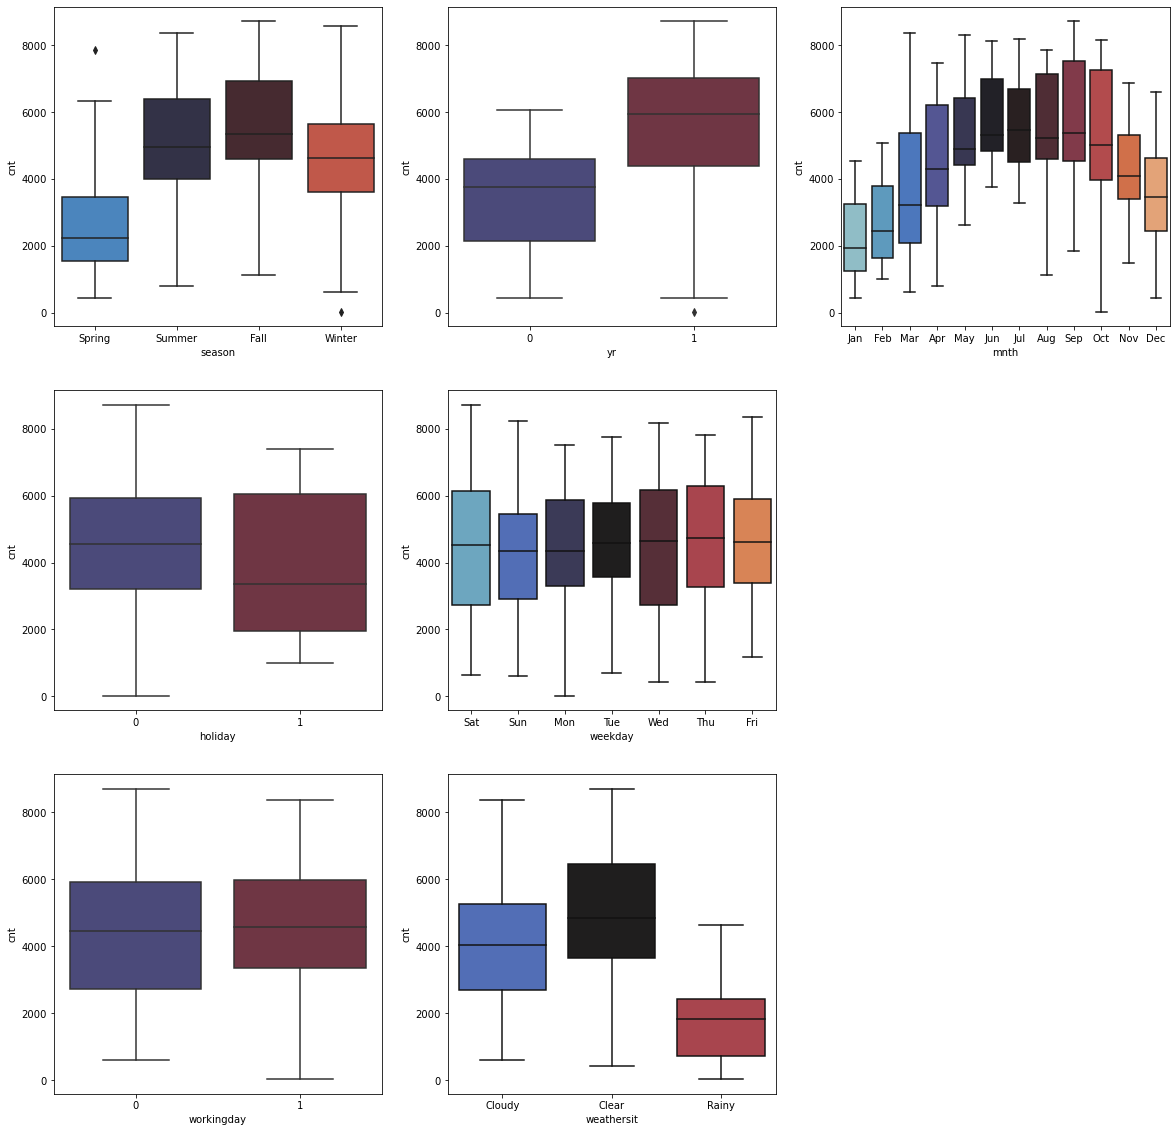

In [27]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bikedata,palette='icefire')
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bikedata,palette='icefire')
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bikedata,palette='icefire')
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bikedata,palette='icefire')
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bikedata,palette='icefire')
#plt.subplot(3,3,6)
#sns.boxplot(x='weekend',y='cnt',data=bikedata,palette='icefire')
plt.subplot(3,3,7)
sns.boxplot(x='workingday',y='cnt',data=bikedata,palette='icefire')
plt.subplot(3,3,8)
sns.boxplot(x='weathersit',y='cnt',data=bikedata,palette='icefire')

plt.show()

28. **Plotting a Heatmap  for all the variables in the dataset**

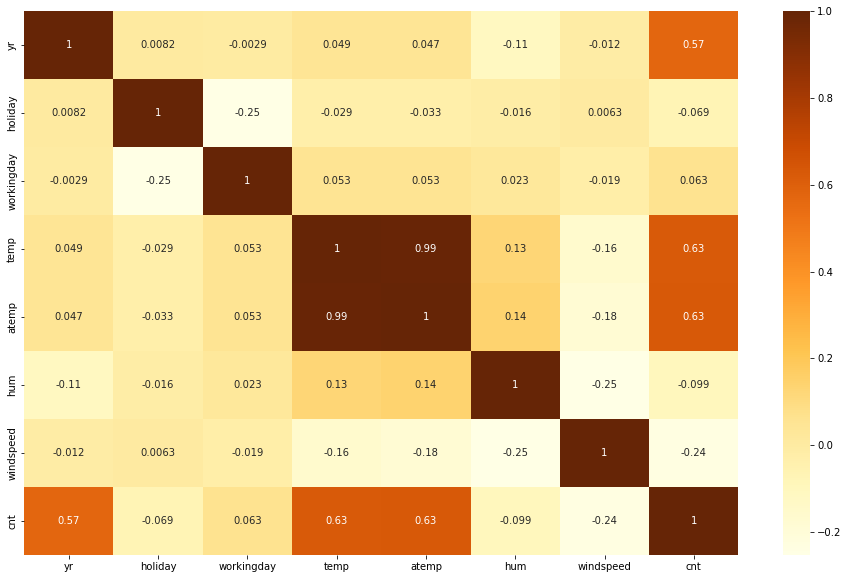

In [28]:
plt.figure(figsize=(16,10))
sns.heatmap(bikedata.corr(),annot=True, cmap="YlOrBr")
plt.show()

29. **Creating Dummy Variables for the "Season" column**

In [29]:
bikedata_season = pd.get_dummies(bikedata["season"],drop_first=True)

30. **Creating Dummy Variables for the "mnth" column**

In [30]:
bikedata_mnth = pd.get_dummies(bikedata["mnth"],drop_first=True)

31. **Creating Dummy Variables for the "weekday" column**

In [31]:
bikedata_weekday = pd.get_dummies(bikedata["weekday"],drop_first=True)

32. **Creating Dummy Variables for the "weathersit" column**

In [32]:
bikedata_weathersit = pd.get_dummies(bikedata["weathersit"],drop_first=True)

33. **Concatenating the 'season','mnth','weekday','weathersit' columns dummy variables into bikedata dataset**

In [33]:
bikedata = pd.concat([bikedata,bikedata_season,bikedata_mnth,bikedata_weekday,bikedata_weathersit],axis=1)

33. **Getting the top 5 rows of the dataset after creating dummy variables**

In [34]:
bikedata.head()

season  yr mnth  holiday weekday  workingday weathersit     temp    atemp  \
0  Spring   0  Jan        0     Sat           0     Cloudy  14.1108  18.1812   
1  Spring   0  Jan        0     Sun           0     Cloudy  14.9026  17.6870   
2  Spring   0  Jan        0     Mon           1      Clear   8.0509   9.4702   
3  Spring   0  Jan        0     Tue           1      Clear   8.2000  10.6061   
4  Spring   0  Jan        0     Wed           1      Clear   9.3052  11.4635   

       hum  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  Cloudy  Rainy  
0  80.5833  ...    0    0    0    1    0    0    0    0       1      0  
1  69.6087  ...    0    0    0    0    1    0    0    0       1      0  
2  43.7273  ...    0    0    1    0    0    0    0    0       0      0  
3  59.0435  ...    0    0    0    0    0    0    1    0       0      0  
4  43.6957  ...    0    0    0    0    0    0    0    1       0      0  

[5 rows x 34 columns]

34. **Getting the columns list**

In [35]:
bikedata.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Spring',
       'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Cloudy', 'Rainy'],
      dtype='object')

35. **Removing the columns from which dummy variables have been derived as their data type is object data type**

In [36]:
bikedata = bikedata.drop(['season','mnth','weekday','weathersit'],axis=1)
bikedata.head()

yr  holiday  workingday     temp    atemp      hum  windspeed   cnt  \
0   0        0           0  14.1108  18.1812  80.5833    10.7499   985   
1   0        0           0  14.9026  17.6870  69.6087    16.6521   801   
2   0        0           1   8.0509   9.4702  43.7273    16.6367  1349   
3   0        0           1   8.2000  10.6061  59.0435    10.7398  1562   
4   0        0           1   9.3052  11.4635  43.6957    12.5223  1600   

   Spring  Summer  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  Cloudy  Rainy  
0       1       0  ...    0    0    0    1    0    0    0    0       1      0  
1       1       0  ...    0    0    0    0    1    0    0    0       1      0  
2       1       0  ...    0    0    1    0    0    0    0    0       0      0  
3       1       0  ...    0    0    0    0    0    0    1    0       0      0  
4       1       0  ...    0    0    0    0    0    0    0    1       0      0  

[5 rows x 30 columns]

36. **Getting the list of newly created columns in bikedata dataset**

In [37]:
bikedata.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Cloudy', 'Rainy'],
      dtype='object')

37. **Checking the data types of all the variables**

In [38]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   Spring      730 non-null    uint8  
 9   Summer      730 non-null    uint8  
 10  Winter      730 non-null    uint8  
 11  Aug         730 non-null    uint8  
 12  Dec         730 non-null    uint8  
 13  Feb         730 non-null    uint8  
 14  Jan         730 non-null    uint8  
 15  Jul         730 non-null    uint8  
 16  Jun         730 non-null    uint8  
 17  Mar         730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  Nov         730 non-null    u

38. **Plotting a Heatmap  for all the variables in the dataset including the newly created dummy variables**

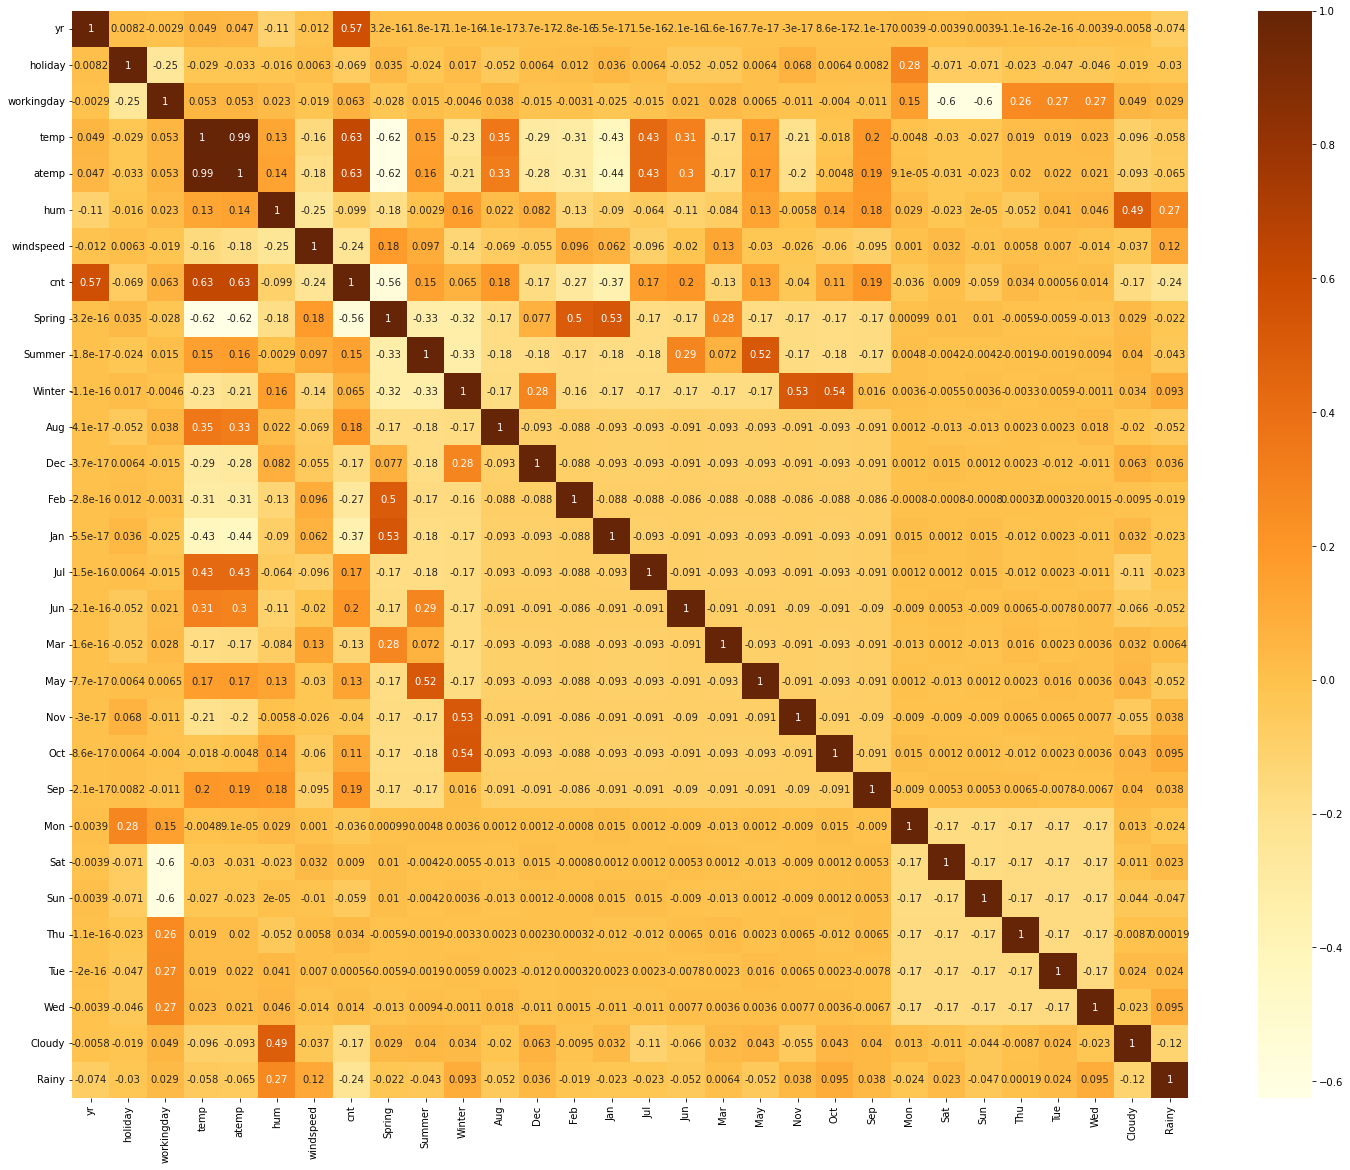

In [39]:
plt.figure(figsize=(25,20))
sns.heatmap(bikedata.corr(),annot=True, cmap="YlOrBr")
plt.show()

# Modelling and Evaluation

39. **Splitting the data into training and testing datasets**

In [40]:
df_train, df_test = train_test_split(bikedata,train_size=0.7,random_state=100)

40. **Checking the shape of the train and test datasets**

In [41]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


41. **Applying Scaling the required features in the training dataset**

In [42]:
scaler = MinMaxScaler()

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

42. **Checking the top 5 rows of the training dataset**

In [43]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815171  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438974  0.640189   0.255342   
728   1        0           0  0.245104  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188474   
111   0        0           1  0.345824  0.318818  0.751824   0.380981   

          cnt  Spring  Summer  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
576  0.827658       0       0  ...    0    0    0    0    0    0    1    0   
426  0.465255       1       0  ...    0    0    0    1    0    0    0    0   
728  0.204096       1       0  ...    0    0    0    0    1    0    0    0   
482  0.482973       0       1  ...    0    0    0    1    0    0    0    0   
111  0.191095       0       1  ...    0    0    0    0    0    0    0    0   

     Cloudy  Rainy  
576       0      0  
426       1      0  
728       0      0  
482       1      0  
111       1      0  

[5 rows x 30 columns]

43. **Plotting a heatmap for train dataset after scaling to see which variables are highly correlated**

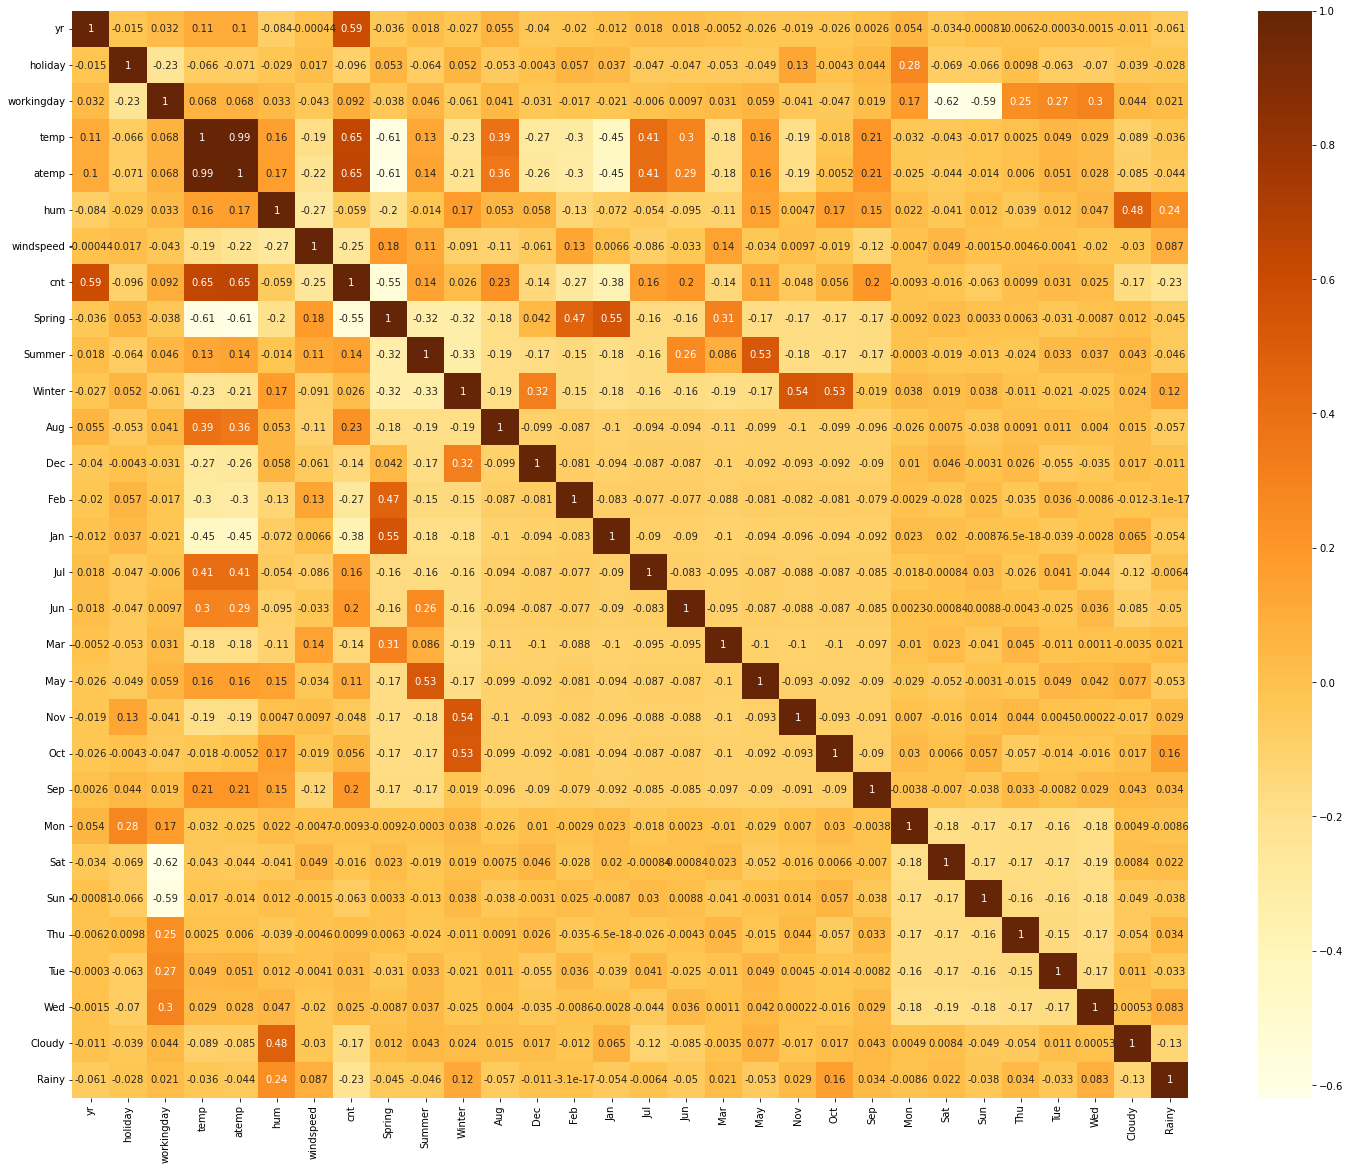

In [44]:
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(),annot=True, cmap="YlOrBr")
plt.show()

44. **Describing the training dataset**

In [45]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537441    0.513156    0.650480   
std      0.500429    0.157763    0.468282    0.225858    0.212410    0.145846   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339855    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.542597    0.529718    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688456    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt      Spring      Summer  ...         Oct  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.320883    0.513499    0.243137    0.247059  ...    0.084314   
std      0.169804    0.224421    0.429398    0.431725  ...    0.278131   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.199178    0.356420    0.000000    0.000000  ...    0.000000   
50%      0.296763    0.518638    0.000000    0.000000  ...    0.000000   
75%      0.414447    0.684710    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sep         Mon         Sat         Sun         Thu         Tue  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.080392    0.150980    0.154902    0.143137    0.133333    0.131373   
std      0.272166    0.358381    0.362166    0.350557    0.340268    0.338139   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Wed      Cloudy       Rainy  
count  510.000000  510.000000  510.000000  
mean     0.158824    0.345098    0.029412  
std      0.365870    0.475867    0.169124  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

45. **Getting the info about the training dataset**

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   cnt         510 non-null    float64
 8   Spring      510 non-null    uint8  
 9   Summer      510 non-null    uint8  
 10  Winter      510 non-null    uint8  
 11  Aug         510 non-null    uint8  
 12  Dec         510 non-null    uint8  
 13  Feb         510 non-null    uint8  
 14  Jan         510 non-null    uint8  
 15  Jul         510 non-null    uint8  
 16  Jun         510 non-null    uint8  
 17  Mar         510 non-null    uint8  
 18  May         510 non-null    uint8  
 19  Nov         510 non-null   

46. **Dividing X_train and y_train sets for model building**

In [47]:
y_train = df_train.pop('cnt')
X_train = df_train

47. **Checking the top 5 rows of the X_train dataset**

In [48]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  Spring  \
576   1        0           1  0.815171  0.766351  0.725633   0.264686       0   
426   1        0           0  0.442393  0.438974  0.640189   0.255342       1   
728   1        0           0  0.245104  0.200348  0.498067   0.663106       1   
482   1        0           0  0.395666  0.391735  0.504508   0.188474       0   
111   0        0           1  0.345824  0.318818  0.751824   0.380981       0   

     Summer  Winter  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  Cloudy  \
576       0       0  ...    0    0    0    0    0    0    1    0       0   
426       0       0  ...    0    0    0    1    0    0    0    0       1   
728       0       0  ...    0    0    0    0    1    0    0    0       0   
482       1       0  ...    0    0    0    1    0    0    0    0       1   
111       1       0  ...    0    0    0    0    0    0    0    0       1   

     Rainy  
576      0  
426      0  
728      0  
482      0  
111      0  

[5 rows x 29 columns]

48. **Adding a constant to the X_train dataset and and also creating a fitted model. Then getting the Summary of the model.**

In [49]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.36
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          2.81e-180
Time:                        10:05:09   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2433      0.035      6.887      0.000       0.174       0.313
yr             0.2325      0.008     28.794      0.000       0.217       0.248
holiday        0.0109      0.024      0.451      0.652      -0.037       0.058
workingday     0.0963      0.012      7.835      0.000       0.072       0.120
temp           0.3880      0.142      2.727      0.007       0.108       0.668
atemp          0.0591      0.138      0.427      0.670      -0.213       0.331
hum           -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed     -0.1836      0.026     -6.962      0.000      -0.235      -0.132
Spring        -0.0454      0.030     -1.511      0.131      -0.104       0.014
Summer         0.0424      0.026      1.617      0.107      -0.009       0.094
Winter         0.1071      0.028      3.826      0.000       0.052       0.162
Aug            0.0223      0.034      0.657      0.511      -0.044       0.089
Dec           -0.0443      0.034     -1.316      0.189      -0.110       0.022
Feb           -0.0323      0.033     -0.980      0.327      -0.097       0.032
Jan           -0.0631      0.034     -1.876      0.061      -0.129       0.003
Jul           -0.0327      0.035     -0.931      0.352      -0.102       0.036
Jun            0.0060      0.025      0.241      0.810      -0.043       0.055
Mar            0.0016      0.025      0.063      0.950      -0.047       0.050
May            0.0255      0.021      1.208      0.228      -0.016       0.067
Nov           -0.0398      0.036     -1.093      0.275      -0.111       0.032
Oct            0.0077      0.036      0.215      0.830      -0.063       0.078
Sep            0.0868      0.032      2.711      0.007       0.024       0.150
Mon           -0.0216      0.015     -1.401      0.162      -0.052       0.009
Sat            0.0952      0.014      6.910      0.000       0.068       0.122
Sun            0.0410      0.014      2.929      0.004       0.013       0.068
Thu           -0.0097      0.016     -0.623      0.534      -0.040       0.021
Tue           -0.0184      0.016     -1.184      0.237      -0.049       0.012
Wed           -0.0059      0.015     -0.394      0.694      -0.035       0.023
Cloudy        -0.0595      0.010     -5.701      0.000      -0.080      -0.039
Rainy         -0.2550      0.026     -9.631      0.000      -0.307      -0.203
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.658
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                     1.78e+16
==============================================================================

N

49. **Checking the VIF for the X_train dataset**

In [50]:
vif  = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
2   workingday  85.56
3         temp  66.90
4        atemp  56.03
22         Sat  19.71
23         Sun  18.34
7       Spring  10.77
9       Winter   9.46
8       Summer   8.29
18         Nov   6.79
10         Aug   6.47
19         Oct   6.47
13         Jan   5.90
11         Dec   5.68
14         Jul   5.64
20         Sep   4.92
1      holiday   4.51
12         Feb   4.39
16         Mar   3.47
15         Jun   2.86
17         May   2.24
5          hum   2.05
21         Mon   1.98
26         Wed   1.94
24         Thu   1.83
25         Tue   1.80
27      Cloudy   1.60
28       Rainy   1.30
6    windspeed   1.30
0           yr   1.06

 50. **Dropping the 'Mar' column as it has more p-value. and again fitting the model and getting the model summary**

In [51]:
X = X_train.drop('Mar', 1,)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          2.75e-181
Time:                        10:05:10   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2441      0.033      7.380      0.000       0.179       0.309
yr             0.2325      0.008     28.824      0.000       0.217       0.248
holiday        0.0111      0.024      0.462      0.645      -0.036       0.058
workingday     0.0965      0.012      8.151      0.000       0.073       0.120
temp           0.3877      0.142      2.729      0.007       0.109       0.667
atemp          0.0588      0.138      0.425      0.671      -0.213       0.330
hum           -0.1518      0.038     -3.950      0.000      -0.227      -0.076
windspeed     -0.1837      0.026     -6.983      0.000      -0.235      -0.132
Spring        -0.0447      0.028     -1.575      0.116      -0.101       0.011
Summer         0.0421      0.026      1.637      0.102      -0.008       0.093
Winter         0.1074      0.027      3.910      0.000       0.053       0.161
Aug            0.0216      0.032      0.676      0.499      -0.041       0.084
Dec           -0.0456      0.026     -1.755      0.080      -0.097       0.005
Feb           -0.0338      0.022     -1.517      0.130      -0.078       0.010
Jan           -0.0646      0.022     -2.892      0.004      -0.109      -0.021
Jul           -0.0333      0.033     -0.999      0.318      -0.099       0.032
Jun            0.0055      0.024      0.233      0.816      -0.041       0.052
May            0.0251      0.020      1.268      0.205      -0.014       0.064
Nov           -0.0410      0.031     -1.333      0.183      -0.102       0.019
Oct            0.0065      0.031      0.213      0.831      -0.054       0.067
Sep            0.0859      0.029      2.961      0.003       0.029       0.143
Mon           -0.0216      0.015     -1.402      0.162      -0.052       0.009
Sat            0.0954      0.013      7.159      0.000       0.069       0.122
Sun            0.0411      0.014      3.011      0.003       0.014       0.068
Thu           -0.0097      0.016     -0.622      0.535      -0.040       0.021
Tue           -0.0184      0.016     -1.185      0.237      -0.049       0.012
Wed           -0.0059      0.015     -0.394      0.694      -0.035       0.023
Cloudy        -0.0595      0.010     -5.708      0.000      -0.080      -0.039
Rainy         -0.2550      0.026     -9.641      0.000      -0.307      -0.203
==============================================================================
Omnibus:                       84.449   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.879
Skew:                          -0.804   Prob(JB):                     9.92e-52
Kurtosis:                       5.910   Cond. No.                     2.66e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

51. **Checking the VIF for the feature varaiables**

In [52]:
vif  = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
2   workingday  74.90
3         temp  66.84
4        atemp  55.99
21         Sat  17.21
22         Sun  16.19
7       Spring   9.66
9       Winter   9.13
8       Summer   7.99
10         Aug   5.74
14         Jul   5.11
17         Nov   4.86
18         Oct   4.73
1      holiday   4.13
19         Sep   4.05
11         Dec   3.39
13         Jan   2.62
15         Jun   2.56
5          hum   2.04
12         Feb   2.02
20         Mon   1.98
16         May   1.96
25         Wed   1.94
23         Thu   1.83
24         Tue   1.80
26      Cloudy   1.60
27       Rainy   1.30
6    windspeed   1.30
0           yr   1.06

 52. **Dropping the 'Jun' column as it has more p-value. and again fitting the model and getting the model summary**

In [53]:
X = X.drop('Jun',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          2.69e-182
Time:                        10:05:10   Log-Likelihood:                 527.09
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2447      0.033      7.430      0.000       0.180       0.309
yr             0.2323      0.008     28.977      0.000       0.217       0.248
holiday        0.0109      0.024      0.454      0.650      -0.036       0.058
workingday     0.0966      0.012      8.188      0.000       0.073       0.120
temp           0.3974      0.136      2.928      0.004       0.131       0.664
atemp          0.0546      0.137      0.399      0.690      -0.214       0.324
hum           -0.1528      0.038     -4.000      0.000      -0.228      -0.078
windspeed     -0.1844      0.026     -7.068      0.000      -0.236      -0.133
Spring        -0.0467      0.027     -1.729      0.085      -0.100       0.006
Summer         0.0406      0.025      1.630      0.104      -0.008       0.090
Winter         0.1063      0.027      3.933      0.000       0.053       0.159
Aug            0.0169      0.025      0.679      0.497      -0.032       0.066
Dec           -0.0461      0.026     -1.779      0.076      -0.097       0.005
Feb           -0.0334      0.022     -1.504      0.133      -0.077       0.010
Jan           -0.0639      0.022     -2.893      0.004      -0.107      -0.020
Jul           -0.0383      0.026     -1.483      0.139      -0.089       0.012
May            0.0229      0.017      1.317      0.188      -0.011       0.057
Nov           -0.0421      0.030     -1.381      0.168      -0.102       0.018
Oct            0.0048      0.030      0.162      0.872      -0.054       0.063
Sep            0.0823      0.024      3.369      0.001       0.034       0.130
Mon           -0.0215      0.015     -1.396      0.163      -0.052       0.009
Sat            0.0957      0.013      7.233      0.000       0.070       0.122
Sun            0.0415      0.014      3.053      0.002       0.015       0.068
Thu           -0.0097      0.016     -0.622      0.534      -0.040       0.021
Tue           -0.0184      0.016     -1.186      0.236      -0.049       0.012
Wed           -0.0058      0.015     -0.388      0.698      -0.035       0.024
Cloudy        -0.0594      0.010     -5.709      0.000      -0.080      -0.039
Rainy         -0.2549      0.026     -9.649      0.000      -0.307      -0.203
==============================================================================
Omnibus:                       83.786   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.641
Skew:                          -0.801   Prob(JB):                     8.26e-51
Kurtosis:                       5.878   Cond. No.                     2.56e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-30. This might indicate

53. **Checking the VIF for the feature varaiables**

In [54]:
vif  = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
2   workingday  74.40
3         temp  61.13
4        atemp  55.03
20         Sat  17.04
21         Sun  16.03
9       Winter   8.85
7       Spring   8.77
8       Summer   7.54
16         Nov   4.77
17         Oct   4.45
1      holiday   4.13
10         Aug   3.52
11         Dec   3.38
14         Jul   3.06
18         Sep   2.87
13         Jan   2.55
5          hum   2.02
12         Feb   2.00
19         Mon   1.98
24         Wed   1.94
22         Thu   1.83
23         Tue   1.80
25      Cloudy   1.60
15         May   1.52
26       Rainy   1.30
6    windspeed   1.28
0           yr   1.05

 54. **Dropping the 'Oct' column as it has more p-value. and again fitting the model and getting the model summary**

In [55]:
X = X.drop('Oct',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.0
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          2.55e-183
Time:                        10:05:10   Log-Likelihood:                 527.08
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -892.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2457      0.032      7.604      0.000       0.182       0.309
yr             0.2323      0.008     29.009      0.000       0.217       0.248
holiday        0.0114      0.024      0.483      0.630      -0.035       0.058
workingday     0.0968      0.012      8.231      0.000       0.074       0.120
temp           0.3961      0.135      2.926      0.004       0.130       0.662
atemp          0.0554      0.137      0.405      0.685      -0.213       0.324
hum           -0.1520      0.038     -4.015      0.000      -0.226      -0.078
windspeed     -0.1841      0.026     -7.081      0.000      -0.235      -0.133
Spring        -0.0474      0.027     -1.771      0.077      -0.100       0.005
Summer         0.0393      0.023      1.677      0.094      -0.007       0.085
Winter         0.1086      0.023      4.756      0.000       0.064       0.153
Aug            0.0157      0.024      0.662      0.508      -0.031       0.062
Dec           -0.0490      0.018     -2.690      0.007      -0.085      -0.013
Feb           -0.0343      0.021     -1.599      0.110      -0.077       0.008
Jan           -0.0648      0.021     -3.045      0.002      -0.107      -0.023
Jul           -0.0394      0.025     -1.598      0.111      -0.088       0.009
May            0.0229      0.017      1.319      0.188      -0.011       0.057
Nov           -0.0459      0.019     -2.421      0.016      -0.083      -0.009
Sep            0.0804      0.021      3.744      0.000       0.038       0.123
Mon           -0.0216      0.015     -1.403      0.161      -0.052       0.009
Sat            0.0959      0.013      7.264      0.000       0.070       0.122
Sun            0.0416      0.014      3.079      0.002       0.015       0.068
Thu           -0.0097      0.016     -0.624      0.533      -0.040       0.021
Tue           -0.0185      0.016     -1.190      0.235      -0.049       0.012
Wed           -0.0058      0.015     -0.390      0.697      -0.035       0.023
Cloudy        -0.0595      0.010     -5.725      0.000      -0.080      -0.039
Rainy         -0.2548      0.026     -9.657      0.000      -0.307      -0.203
==============================================================================
Omnibus:                       83.300   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.418
Skew:                          -0.798   Prob(JB):                     2.51e-50
Kurtosis:                       5.864   Cond. No.                     2.45e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.85e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

55. **Checking the VIF for the feature varaiables**

In [56]:
vif  = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
2   workingday  72.18
3         temp  60.92
4        atemp  54.96
19         Sat  16.55
20         Sun  15.54
7       Spring   8.60
8       Summer   6.66
9       Winter   6.34
1      holiday   3.98
10         Aug   3.19
14         Jul   2.81
13         Jan   2.38
17         Sep   2.23
5          hum   1.99
18         Mon   1.98
23         Wed   1.94
12         Feb   1.87
16         Nov   1.85
21         Thu   1.83
22         Tue   1.80
11         Dec   1.68
24      Cloudy   1.59
15         May   1.52
25       Rainy   1.30
6    windspeed   1.27
0           yr   1.05

 56. **Dropping the 'Wed' column as it has more p-value. and again fitting the model and getting the model summary**

In [57]:
X = X.drop('Wed',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          2.52e-184
Time:                        10:05:10   Log-Likelihood:                 527.00
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.601      0.000       0.182       0.308
yr             0.2323      0.008     29.032      0.000       0.217       0.248
holiday        0.0099      0.023      0.423      0.672      -0.036       0.056
workingday     0.0949      0.011      8.853      0.000       0.074       0.116
temp           0.3987      0.135      2.952      0.003       0.133       0.664
atemp          0.0523      0.136      0.383      0.702      -0.216       0.320
hum           -0.1526      0.038     -4.036      0.000      -0.227      -0.078
windspeed     -0.1842      0.026     -7.091      0.000      -0.235      -0.133
Spring        -0.0475      0.027     -1.777      0.076      -0.100       0.005
Summer         0.0391      0.023      1.672      0.095      -0.007       0.085
Winter         0.1087      0.023      4.762      0.000       0.064       0.153
Aug            0.0158      0.024      0.665      0.506      -0.031       0.062
Dec           -0.0490      0.018     -2.690      0.007      -0.085      -0.013
Feb           -0.0343      0.021     -1.600      0.110      -0.076       0.008
Jan           -0.0649      0.021     -3.053      0.002      -0.107      -0.023
Jul           -0.0392      0.025     -1.588      0.113      -0.088       0.009
May            0.0229      0.017      1.322      0.187      -0.011       0.057
Nov           -0.0462      0.019     -2.444      0.015      -0.083      -0.009
Sep            0.0803      0.021      3.742      0.000       0.038       0.122
Mon           -0.0183      0.013     -1.415      0.158      -0.044       0.007
Sat            0.0972      0.013      7.639      0.000       0.072       0.122
Sun            0.0430      0.013      3.295      0.001       0.017       0.069
Thu           -0.0064      0.013     -0.492      0.623      -0.032       0.019
Tue           -0.0152      0.013     -1.162      0.246      -0.041       0.011
Cloudy        -0.0592      0.010     -5.717      0.000      -0.080      -0.039
Rainy         -0.2556      0.026     -9.719      0.000      -0.307      -0.204
==============================================================================
Omnibus:                       82.771   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.941
Skew:                          -0.793   Prob(JB):                     5.25e-50
Kurtosis:                       5.857   Cond. No.                     2.58e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.56e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

57. **Checking the VIF for the feature varaiables**

In [58]:
vif  = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
2   workingday  70.22
3         temp  60.77
4        atemp  54.77
19         Sat  16.52
20         Sun  15.51
7       Spring   8.60
8       Summer   6.66
9       Winter   6.34
1      holiday   3.92
10         Aug   3.19
14         Jul   2.81
13         Jan   2.38
17         Sep   2.23
5          hum   1.98
12         Feb   1.87
16         Nov   1.85
11         Dec   1.68
23      Cloudy   1.59
15         May   1.52
18         Mon   1.41
21         Thu   1.29
24       Rainy   1.29
22         Tue   1.28
6    windspeed   1.27
0           yr   1.05

58. **Dropping the 'atemp' column as it has more p-value. and again fitting the model and getting the model summary**

In [59]:
X = X.drop('atemp',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          2.42e-185
Time:                        10:05:10   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2447      0.032      7.601      0.000       0.181       0.308
yr             0.2322      0.008     29.055      0.000       0.217       0.248
holiday        0.0092      0.023      0.398      0.691      -0.036       0.055
workingday     0.0949      0.011      8.858      0.000       0.074       0.116
temp           0.4483      0.038     11.674      0.000       0.373       0.524
hum           -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed     -0.1862      0.025     -7.319      0.000      -0.236      -0.136
Spring        -0.0467      0.027     -1.755      0.080      -0.099       0.006
Summer         0.0399      0.023      1.716      0.087      -0.006       0.086
Winter         0.1095      0.023      4.830      0.000       0.065       0.154
Aug            0.0151      0.024      0.638      0.524      -0.031       0.061
Dec           -0.0489      0.018     -2.689      0.007      -0.085      -0.013
Feb           -0.0344      0.021     -1.603      0.110      -0.076       0.008
Jan           -0.0651      0.021     -3.067      0.002      -0.107      -0.023
Jul           -0.0392      0.025     -1.591      0.112      -0.088       0.009
May            0.0227      0.017      1.311      0.191      -0.011       0.057
Nov           -0.0462      0.019     -2.443      0.015      -0.083      -0.009
Sep            0.0803      0.021      3.746      0.000       0.038       0.122
Mon           -0.0179      0.013     -1.389      0.165      -0.043       0.007
Sat            0.0974      0.013      7.663      0.000       0.072       0.122
Sun            0.0432      0.013      3.313      0.001       0.018       0.069
Thu           -0.0061      0.013     -0.467      0.640      -0.032       0.020
Tue           -0.0150      0.013     -1.145      0.253      -0.041       0.011
Cloudy        -0.0593      0.010     -5.730      0.000      -0.080      -0.039
Rainy         -0.2563      0.026     -9.782      0.000      -0.308      -0.205
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.234
Skew:                          -0.788   Prob(JB):                     1.23e-49
Kurtosis:                       5.849   Cond. No.                     2.57e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.37e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

59. **Checking the VIF for the feature varaiables**

In [60]:
vif  = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
2   workingday  70.18
18         Sat  16.52
19         Sun  15.51
6       Spring   8.55
7       Summer   6.60
8       Winter   6.27
3         temp   4.92
1      holiday   3.91
9          Aug   3.17
13         Jul   2.81
12         Jan   2.38
16         Sep   2.23
4          hum   1.98
11         Feb   1.87
15         Nov   1.85
10         Dec   1.68
22      Cloudy   1.59
14         May   1.51
17         Mon   1.40
20         Thu   1.29
21         Tue   1.28
23       Rainy   1.28
5    windspeed   1.22
0           yr   1.05

 60. **Dropping the 'holiday' column as it has more p-value. and again fitting the model and getting the model summary**

In [61]:
X = X.drop('holiday',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          2.42e-185
Time:                        10:05:11   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2539      0.048      5.250      0.000       0.159       0.349
yr             0.2322      0.008     29.055      0.000       0.217       0.248
workingday     0.0856      0.026      3.248      0.001       0.034       0.137
temp           0.4483      0.038     11.674      0.000       0.373       0.524
hum           -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed     -0.1862      0.025     -7.319      0.000      -0.236      -0.136
Spring        -0.0467      0.027     -1.755      0.080      -0.099       0.006
Summer         0.0399      0.023      1.716      0.087      -0.006       0.086
Winter         0.1095      0.023      4.830      0.000       0.065       0.154
Aug            0.0151      0.024      0.638      0.524      -0.031       0.061
Dec           -0.0489      0.018     -2.689      0.007      -0.085      -0.013
Feb           -0.0344      0.021     -1.603      0.110      -0.076       0.008
Jan           -0.0651      0.021     -3.067      0.002      -0.107      -0.023
Jul           -0.0392      0.025     -1.591      0.112      -0.088       0.009
May            0.0227      0.017      1.311      0.191      -0.011       0.057
Nov           -0.0462      0.019     -2.443      0.015      -0.083      -0.009
Sep            0.0803      0.021      3.746      0.000       0.038       0.122
Mon           -0.0179      0.013     -1.389      0.165      -0.043       0.007
Sat            0.0881      0.029      3.043      0.002       0.031       0.145
Sun            0.0339      0.029      1.168      0.244      -0.023       0.091
Thu           -0.0061      0.013     -0.467      0.640      -0.032       0.020
Tue           -0.0150      0.013     -1.145      0.253      -0.041       0.011
Cloudy        -0.0593      0.010     -5.730      0.000      -0.080      -0.039
Rainy         -0.2563      0.026     -9.782      0.000      -0.308      -0.205
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.234
Skew:                          -0.788   Prob(JB):                     1.23e-49
Kurtosis:                       5.849   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

61. **Checking the VIF for the feature varaiables**

In [62]:
vif  = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
3          hum  36.38
2         temp  24.25
1   workingday  20.83
5       Spring   8.39
6       Summer   6.70
7       Winter   6.69
17         Sat   5.91
18         Sun   5.58
4    windspeed   5.13
8          Aug   3.26
12         Jul   2.89
11         Jan   2.44
21      Cloudy   2.37
15         Sep   2.20
0           yr   2.13
10         Feb   1.94
14         Nov   1.86
9          Dec   1.72
13         May   1.61
16         Mon   1.57
19         Thu   1.47
20         Tue   1.47
22       Rainy   1.31

 62. **Dropping the 'Thu' column as it has more p-value. and again fitting the model and getting the model summary**

In [63]:
X = X.drop('Thu',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          2.36e-186
Time:                        10:05:11   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2512      0.048      5.235      0.000       0.157       0.345
yr             0.2322      0.008     29.077      0.000       0.217       0.248
workingday     0.0861      0.026      3.269      0.001       0.034       0.138
temp           0.4484      0.038     11.686      0.000       0.373       0.524
hum           -0.1516      0.038     -4.024      0.000      -0.226      -0.078
windspeed     -0.1863      0.025     -7.327      0.000      -0.236      -0.136
Spring        -0.0466      0.027     -1.753      0.080      -0.099       0.006
Summer         0.0401      0.023      1.726      0.085      -0.006       0.086
Winter         0.1099      0.023      4.851      0.000       0.065       0.154
Aug            0.0152      0.024      0.645      0.520      -0.031       0.062
Dec           -0.0492      0.018     -2.709      0.007      -0.085      -0.014
Feb           -0.0340      0.021     -1.590      0.112      -0.076       0.008
Jan           -0.0650      0.021     -3.066      0.002      -0.107      -0.023
Jul           -0.0389      0.025     -1.583      0.114      -0.087       0.009
May            0.0228      0.017      1.317      0.188      -0.011       0.057
Nov           -0.0466      0.019     -2.472      0.014      -0.084      -0.010
Sep            0.0803      0.021      3.747      0.000       0.038       0.122
Mon           -0.0160      0.012     -1.310      0.191      -0.040       0.008
Sat            0.0905      0.028      3.175      0.002       0.034       0.146
Sun            0.0363      0.029      1.268      0.205      -0.020       0.092
Tue           -0.0131      0.012     -1.052      0.293      -0.037       0.011
Cloudy        -0.0591      0.010     -5.719      0.000      -0.079      -0.039
Rainy         -0.2565      0.026     -9.797      0.000      -0.308      -0.205
==============================================================================
Omnibus:                       82.702   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.334
Skew:                          -0.792   Prob(JB):                     4.32e-50
Kurtosis:                       5.862   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

63. **Checking the VIF for the feature varaiables**

In [64]:
vif  = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
3          hum  36.34
2         temp  24.14
1   workingday  20.80
5       Spring   8.36
6       Summer   6.68
7       Winter   6.68
17         Sat   5.81
18         Sun   5.49
4    windspeed   5.12
8          Aug   3.26
12         Jul   2.89
11         Jan   2.44
20      Cloudy   2.36
15         Sep   2.20
0           yr   2.13
10         Feb   1.94
14         Nov   1.85
9          Dec   1.71
13         May   1.61
16         Mon   1.42
19         Tue   1.33
21       Rainy   1.31

 64. **Dropping the 'Aug' column as it has more p-value. and again fitting the model and getting the model summary**

In [65]:
X = X.drop('Aug',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          2.47e-187
Time:                        10:05:11   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2594      0.046      5.611      0.000       0.169       0.350
yr             0.2324      0.008     29.128      0.000       0.217       0.248
workingday     0.0863      0.026      3.282      0.001       0.035       0.138
temp           0.4502      0.038     11.769      0.000       0.375       0.525
hum           -0.1505      0.038     -4.001      0.000      -0.224      -0.077
windspeed     -0.1864      0.025     -7.338      0.000      -0.236      -0.137
Spring        -0.0564      0.022     -2.576      0.010      -0.099      -0.013
Summer         0.0298      0.017      1.766      0.078      -0.003       0.063
Winter         0.1009      0.018      5.663      0.000       0.066       0.136
Dec           -0.0500      0.018     -2.758      0.006      -0.086      -0.014
Feb           -0.0340      0.021     -1.591      0.112      -0.076       0.008
Jan           -0.0650      0.021     -3.067      0.002      -0.107      -0.023
Jul           -0.0498      0.018     -2.770      0.006      -0.085      -0.014
May            0.0224      0.017      1.299      0.195      -0.012       0.056
Nov           -0.0476      0.019     -2.534      0.012      -0.085      -0.011
Sep            0.0716      0.017      4.303      0.000       0.039       0.104
Mon           -0.0160      0.012     -1.317      0.188      -0.040       0.008
Sat            0.0911      0.028      3.201      0.001       0.035       0.147
Sun            0.0364      0.029      1.275      0.203      -0.020       0.093
Tue           -0.0129      0.012     -1.040      0.299      -0.037       0.011
Cloudy        -0.0588      0.010     -5.703      0.000      -0.079      -0.039
Rainy         -0.2573      0.026     -9.847      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       83.894   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.499
Skew:                          -0.803   Prob(JB):                     8.87e-51
Kurtosis:                       5.875   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

65. **Checking the VIF for the feature varaiables**

In [66]:
vif  = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
3          hum  35.48
2         temp  22.61
1   workingday  19.86
5       Spring   6.09
16         Sat   5.52
17         Sun   5.30
4    windspeed   5.09
7       Winter   4.45
6       Summer   3.76
10         Jan   2.43
19      Cloudy   2.36
0           yr   2.12
9          Feb   1.93
13         Nov   1.85
8          Dec   1.71
11         Jul   1.62
12         May   1.60
14         Sep   1.41
15         Mon   1.41
18         Tue   1.33
20       Rainy   1.30

 66. **Dropping the 'Tue' column as it has more p-value. and again fitting the model and getting the model summary**

In [67]:
X = X.drop('Tue',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          3.51e-188
Time:                        10:05:11   Log-Likelihood:                 526.03
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2580      0.046      5.582      0.000       0.167       0.349
yr             0.2323      0.008     29.122      0.000       0.217       0.248
workingday     0.0856      0.026      3.254      0.001       0.034       0.137
temp           0.4505      0.038     11.777      0.000       0.375       0.526
hum           -0.1518      0.038     -4.038      0.000      -0.226      -0.078
windspeed     -0.1869      0.025     -7.358      0.000      -0.237      -0.137
Spring        -0.0562      0.022     -2.566      0.011      -0.099      -0.013
Summer         0.0296      0.017      1.751      0.081      -0.004       0.063
Winter         0.1004      0.018      5.639      0.000       0.065       0.135
Dec           -0.0492      0.018     -2.718      0.007      -0.085      -0.014
Feb           -0.0350      0.021     -1.636      0.102      -0.077       0.007
Jan           -0.0649      0.021     -3.062      0.002      -0.107      -0.023
Jul           -0.0507      0.018     -2.825      0.005      -0.086      -0.015
May            0.0222      0.017      1.285      0.199      -0.012       0.056
Nov           -0.0475      0.019     -2.525      0.012      -0.084      -0.011
Sep            0.0718      0.017      4.314      0.000       0.039       0.104
Mon           -0.0130      0.012     -1.102      0.271      -0.036       0.010
Sat            0.0934      0.028      3.289      0.001       0.038       0.149
Sun            0.0389      0.029      1.364      0.173      -0.017       0.095
Cloudy        -0.0586      0.010     -5.683      0.000      -0.079      -0.038
Rainy         -0.2557      0.026     -9.802      0.000      -0.307      -0.204
==============================================================================
Omnibus:                       84.077   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.011
Skew:                          -0.797   Prob(JB):                     5.63e-52
Kurtosis:                       5.926   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

67. **Checking the VIF for the feature varaiables**

In [68]:
vif  = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
3          hum  35.40
2         temp  22.60
1   workingday  19.79
5       Spring   6.09
16         Sat   5.49
17         Sun   5.26
4    windspeed   5.09
7       Winter   4.45
6       Summer   3.75
10         Jan   2.43
18      Cloudy   2.36
0           yr   2.12
9          Feb   1.93
13         Nov   1.85
8          Dec   1.71
11         Jul   1.61
12         May   1.60
14         Sep   1.41
15         Mon   1.33
19       Rainy   1.30

 68. **Dropping the 'Mon' column as it has more p-value. and again fitting the model and getting the model summary**

In [69]:
X = X.drop('Mon',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          5.20e-189
Time:                        10:05:11   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2478      0.045      5.472      0.000       0.159       0.337
yr             0.2318      0.008     29.103      0.000       0.216       0.247
workingday     0.0933      0.025      3.679      0.000       0.043       0.143
temp           0.4526      0.038     11.846      0.000       0.378       0.528
hum           -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed     -0.1873      0.025     -7.371      0.000      -0.237      -0.137
Spring        -0.0553      0.022     -2.528      0.012      -0.098      -0.012
Summer         0.0295      0.017      1.747      0.081      -0.004       0.063
Winter         0.1001      0.018      5.618      0.000       0.065       0.135
Dec           -0.0488      0.018     -2.692      0.007      -0.084      -0.013
Feb           -0.0348      0.021     -1.626      0.105      -0.077       0.007
Jan           -0.0650      0.021     -3.067      0.002      -0.107      -0.023
Jul           -0.0510      0.018     -2.844      0.005      -0.086      -0.016
May            0.0229      0.017      1.325      0.186      -0.011       0.057
Nov           -0.0461      0.019     -2.456      0.014      -0.083      -0.009
Sep            0.0723      0.017      4.349      0.000       0.040       0.105
Sat            0.1036      0.027      3.864      0.000       0.051       0.156
Sun            0.0492      0.027      1.827      0.068      -0.004       0.102
Cloudy        -0.0583      0.010     -5.655      0.000      -0.079      -0.038
Rainy         -0.2549      0.026     -9.773      0.000      -0.306      -0.204
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.035
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

69. **Checking the VIF for the feature varaiables**

In [70]:
vif  = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
3          hum  34.75
2         temp  22.48
1   workingday  19.11
5       Spring   6.06
15         Sat   5.10
4    windspeed   5.06
16         Sun   4.89
7       Winter   4.40
6       Summer   3.71
10         Jan   2.42
17      Cloudy   2.35
0           yr   2.11
9          Feb   1.92
13         Nov   1.85
8          Dec   1.71
11         Jul   1.61
12         May   1.59
14         Sep   1.41
18       Rainy   1.29

 70. **Dropping the 'May' column as it has more p-value. and again fitting the model and getting the model summary**

In [71]:
X = X.drop('May',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          9.80e-190
Time:                        10:05:11   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2368      0.045      5.315      0.000       0.149       0.324
yr             0.2312      0.008     29.052      0.000       0.216       0.247
workingday     0.0942      0.025      3.713      0.000       0.044       0.144
temp           0.4616      0.038     12.262      0.000       0.388       0.536
hum           -0.1477      0.037     -3.958      0.000      -0.221      -0.074
windspeed     -0.1889      0.025     -7.441      0.000      -0.239      -0.139
Spring        -0.0515      0.022     -2.373      0.018      -0.094      -0.009
Summer         0.0393      0.015      2.586      0.010       0.009       0.069
Winter         0.1021      0.018      5.752      0.000       0.067       0.137
Dec           -0.0474      0.018     -2.619      0.009      -0.083      -0.012
Feb           -0.0334      0.021     -1.562      0.119      -0.075       0.009
Jan           -0.0634      0.021     -2.991      0.003      -0.105      -0.022
Jul           -0.0515      0.018     -2.868      0.004      -0.087      -0.016
Nov           -0.0444      0.019     -2.371      0.018      -0.081      -0.008
Sep            0.0723      0.017      4.346      0.000       0.040       0.105
Sat            0.1040      0.027      3.875      0.000       0.051       0.157
Sun            0.0500      0.027      1.855      0.064      -0.003       0.103
Cloudy        -0.0585      0.010     -5.668      0.000      -0.079      -0.038
Rainy         -0.2567      0.026     -9.849      0.000      -0.308      -0.206
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.716
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

71. **Checking the VIF for the feature varaiables**

In [72]:
vif  = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
3          hum  34.64
2         temp  22.30
1   workingday  18.92
5       Spring   6.05
14         Sat   5.04
4    windspeed   4.99
15         Sun   4.85
7       Winter   4.40
6       Summer   3.11
10         Jan   2.42
16      Cloudy   2.35
0           yr   2.10
9          Feb   1.92
12         Nov   1.84
8          Dec   1.71
11         Jul   1.61
13         Sep   1.41
17       Rainy   1.29

 72. **Dropping the 'Feb' column as it has more p-value. and again fitting the model and getting the model summary**

In [73]:
X = X.drop('Feb',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          2.52e-190
Time:                        10:05:11   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2235      0.044      5.103      0.000       0.137       0.310
yr             0.2309      0.008     28.978      0.000       0.215       0.247
workingday     0.0964      0.025      3.801      0.000       0.047       0.146
temp           0.4764      0.036     13.064      0.000       0.405       0.548
hum           -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed     -0.1879      0.025     -7.390      0.000      -0.238      -0.138
Spring        -0.0607      0.021     -2.899      0.004      -0.102      -0.020
Summer         0.0424      0.015      2.809      0.005       0.013       0.072
Winter         0.1038      0.018      5.845      0.000       0.069       0.139
Dec           -0.0388      0.017     -2.248      0.025      -0.073      -0.005
Jan           -0.0455      0.018     -2.548      0.011      -0.081      -0.010
Jul           -0.0524      0.018     -2.916      0.004      -0.088      -0.017
Nov           -0.0399      0.019     -2.152      0.032      -0.076      -0.003
Sep            0.0737      0.017      4.430      0.000       0.041       0.106
Sat            0.1068      0.027      3.984      0.000       0.054       0.160
Sun            0.0520      0.027      1.931      0.054      -0.001       0.105
Cloudy        -0.0583      0.010     -5.637      0.000      -0.079      -0.038
Rainy         -0.2555      0.026     -9.791      0.000      -0.307      -0.204
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.531
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

73. **Checking the VIF for the feature varaiables**

In [74]:
vif  = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
3          hum  34.19
2         temp  21.56
1   workingday  18.84
5       Spring   5.06
13         Sat   5.03
4    windspeed   4.99
14         Sun   4.83
7       Winter   4.40
6       Summer   3.09
15      Cloudy   2.35
0           yr   2.10
11         Nov   1.82
9          Jan   1.77
10         Jul   1.61
8          Dec   1.58
12         Sep   1.41
16       Rainy   1.29

 74. **Dropping the 'Sun' column as it has more p-value. and again fitting the model and getting the model summary**

In [75]:
X = X.drop('Sun',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          1.20e-190
Time:                        10:05:12   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2690      0.037      7.267      0.000       0.196       0.342
yr             0.2311      0.008     28.929      0.000       0.215       0.247
workingday     0.0521      0.011      4.826      0.000       0.031       0.073
temp           0.4744      0.037     12.978      0.000       0.403       0.546
hum           -0.1480      0.037     -3.952      0.000      -0.222      -0.074
windspeed     -0.1883      0.025     -7.386      0.000      -0.238      -0.138
Spring        -0.0624      0.021     -2.974      0.003      -0.104      -0.021
Summer         0.0421      0.015      2.783      0.006       0.012       0.072
Winter         0.1038      0.018      5.832      0.000       0.069       0.139
Dec           -0.0398      0.017     -2.302      0.022      -0.074      -0.006
Jan           -0.0465      0.018     -2.596      0.010      -0.082      -0.011
Jul           -0.0514      0.018     -2.854      0.004      -0.087      -0.016
Nov           -0.0441      0.018     -2.391      0.017      -0.080      -0.008
Sep            0.0714      0.017      4.289      0.000       0.039       0.104
Sat            0.0625      0.014      4.493      0.000       0.035       0.090
Cloudy        -0.0581      0.010     -5.607      0.000      -0.078      -0.038
Rainy         -0.2552      0.026     -9.754      0.000      -0.307      -0.204
==============================================================================
Omnibus:                       82.404   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.437
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

75. **Checking the VIF for the feature varaiables**

In [76]:
vif  = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
3          hum  31.08
2         temp  18.94
1   workingday   4.77
4    windspeed   4.77
5       Spring   4.50
7       Winter   4.11
6       Summer   2.88
14      Cloudy   2.32
0           yr   2.09
13         Sat   1.86
11         Nov   1.82
9          Jan   1.76
10         Jul   1.59
8          Dec   1.57
12         Sep   1.41
15       Rainy   1.28

 76. **Dropping the 'hum' column as it has more VIF. and again fitting the model and getting the model summary**

In [77]:
X = X.drop('hum',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          1.84e-188
Time:                        10:05:12   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1985      0.033      6.031      0.000       0.134       0.263
yr             0.2348      0.008     29.173      0.000       0.219       0.251
workingday     0.0547      0.011      5.009      0.000       0.033       0.076
temp           0.4354      0.036     12.191      0.000       0.365       0.506
windspeed     -0.1609      0.025     -6.464      0.000      -0.210      -0.112
Spring        -0.0713      0.021     -3.371      0.001      -0.113      -0.030
Summer         0.0354      0.015      2.320      0.021       0.005       0.065
Winter         0.0903      0.018      5.093      0.000       0.055       0.125
Dec           -0.0467      0.017     -2.675      0.008      -0.081      -0.012
Jan           -0.0526      0.018     -2.905      0.004      -0.088      -0.017
Jul           -0.0466      0.018     -2.554      0.011      -0.082      -0.011
Nov           -0.0447      0.019     -2.389      0.017      -0.081      -0.008
Sep            0.0652      0.017      3.880      0.000       0.032       0.098
Sat            0.0670      0.014      4.758      0.000       0.039       0.095
Cloudy        -0.0818      0.009     -9.526      0.000      -0.099      -0.065
Rainy         -0.2969      0.024    -12.222      0.000      -0.345      -0.249
==============================================================================
Omnibus:                       85.035   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.572
Skew:                          -0.805   Prob(JB):                     9.50e-53
Kurtosis:                       5.946   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

77. **Checking the VIF for the feature varaiables**

In [78]:
vif  = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']  = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
2         temp  6.92
1   workingday  4.74
3    windspeed  4.71
4       Spring  3.09
6       Winter  3.03
5       Summer  2.33
0           yr  2.08
12         Sat  1.86
10         Nov  1.79
8          Jan  1.67
9          Jul  1.59
13      Cloudy  1.58
7          Dec  1.49
11         Sep  1.35
14       Rainy  1.09

78. **Checking the shape of the X set after removing unrequired variables.**

In [79]:
X.shape

(510, 15)

79. **Getting the list of all remaining columns**

In [80]:
X.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'Spring', 'Summer', 'Winter',
       'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Sat', 'Cloudy', 'Rainy'],
      dtype='object')

80. **Predicting the y_train values using X_train_sm values.**

In [81]:
y_train_pred = lr_model.predict(X_train_sm)

81. **Getting the r2_score of the train dataset**

In [82]:
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8444123004170616

82. **Plotting a histogram of the error terms**

<AxesSubplot:ylabel='Density'>

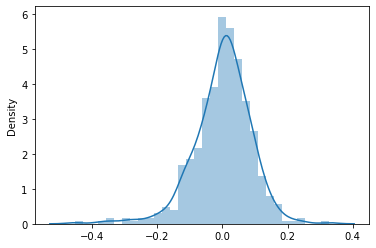

In [83]:
res = y_train-y_train_pred
sns.distplot(res)

83. **Plotting a scatterplot for predicted train dataset**

Text(0, 0.5, 'y-train-pred')

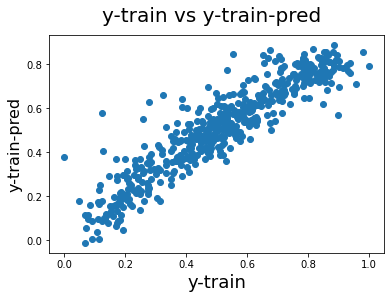

In [84]:
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y-train vs y-train-pred',fontsize=20)
plt.xlabel('y-train', fontsize=18)
plt.ylabel('y-train-pred', fontsize=16)

84. **Applying scaling for the test dataset**

In [85]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
#scaler.transform()
df_test[num_vars] = scaler.transform(df_test[num_vars])


85. **Getting the top 5 rows of the test dataset**

In [86]:
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.831783  0.769661  0.657364   0.084218   
535   1        0           1  0.901355  0.842589  0.610133   0.153727   
299   0        0           1  0.511965  0.496145  0.837699   0.334205   
221   0        0           1  0.881625  0.795344  0.437098   0.339570   
152   0        0           1  0.817247  0.741471  0.314298   0.537413   

          cnt  Spring  Summer  ...  Oct  Sep  Mon  Sat  Sun  Thu  Tue  Wed  \
184  0.692706       0       0  ...    0    0    1    0    0    0    0    0   
535  0.712034       0       1  ...    0    0    0    0    0    0    0    1   
299  0.303382       0       0  ...    1    0    0    0    0    1    0    0   
221  0.547400       0       0  ...    0    0    0    0    0    0    0    1   
152  0.569029       0       1  ...    0    0    0    0    0    1    0    0   

     Cloudy  Rainy  
184       1      0  
535       0      0  
299       1      0  
221       0      0  
152       0      0  

[5 rows x 30 columns]

86. **Describing the test dataset**

In [87]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.700000    0.558719    0.532846    0.638221   
std      0.500809    0.187620    0.459303    0.233187    0.217401    0.148694   
min      0.000000    0.000000    0.000000    0.046593    0.025951    0.261915   
25%      0.000000    0.000000    0.000000    0.355430    0.344870    0.529197   
50%      0.000000    0.000000    1.000000    0.558172    0.544652    0.625590   
75%      1.000000    0.000000    1.000000    0.755984    0.713308    0.743798   
max      1.000000    1.000000    1.000000    0.984424    0.980935    1.002146   

        windspeed         cnt      Spring      Summer  ...         Oct  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.313293    0.522154    0.254545    0.263636  ...    0.086364   
std      0.159584    0.219163    0.436599    0.441609  ...    0.281541   
min     -0.042810    0.048205    0.000000    0.000000  ...    0.000000   
25%      0.198842    0.378595    0.000000    0.000000  ...    0.000000   
50%      0.300126    0.524678    0.000000    0.000000  ...    0.000000   
75%      0.402719    0.677750    1.000000    1.000000  ...    0.000000   
max      0.807474    0.963300    1.000000    1.000000  ...    1.000000   

              Sep         Mon         Sat         Sun         Thu         Tue  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.086364    0.127273    0.118182    0.145455    0.163636    0.168182   
std      0.281541    0.334038    0.323559    0.353363    0.370789    0.374881   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Wed      Cloudy       Rainy  
count  220.000000  220.000000  220.000000  
mean     0.100000    0.318182    0.027273  
std      0.300684    0.466833    0.163248  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

87. **Getting the info about the test dataset**

In [88]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          220 non-null    int64  
 1   holiday     220 non-null    int64  
 2   workingday  220 non-null    int64  
 3   temp        220 non-null    float64
 4   atemp       220 non-null    float64
 5   hum         220 non-null    float64
 6   windspeed   220 non-null    float64
 7   cnt         220 non-null    float64
 8   Spring      220 non-null    uint8  
 9   Summer      220 non-null    uint8  
 10  Winter      220 non-null    uint8  
 11  Aug         220 non-null    uint8  
 12  Dec         220 non-null    uint8  
 13  Feb         220 non-null    uint8  
 14  Jan         220 non-null    uint8  
 15  Jul         220 non-null    uint8  
 16  Jun         220 non-null    uint8  
 17  Mar         220 non-null    uint8  
 18  May         220 non-null    uint8  
 19  Nov         220 non-null   

88. **Plotting a heatmap for the test dataset **

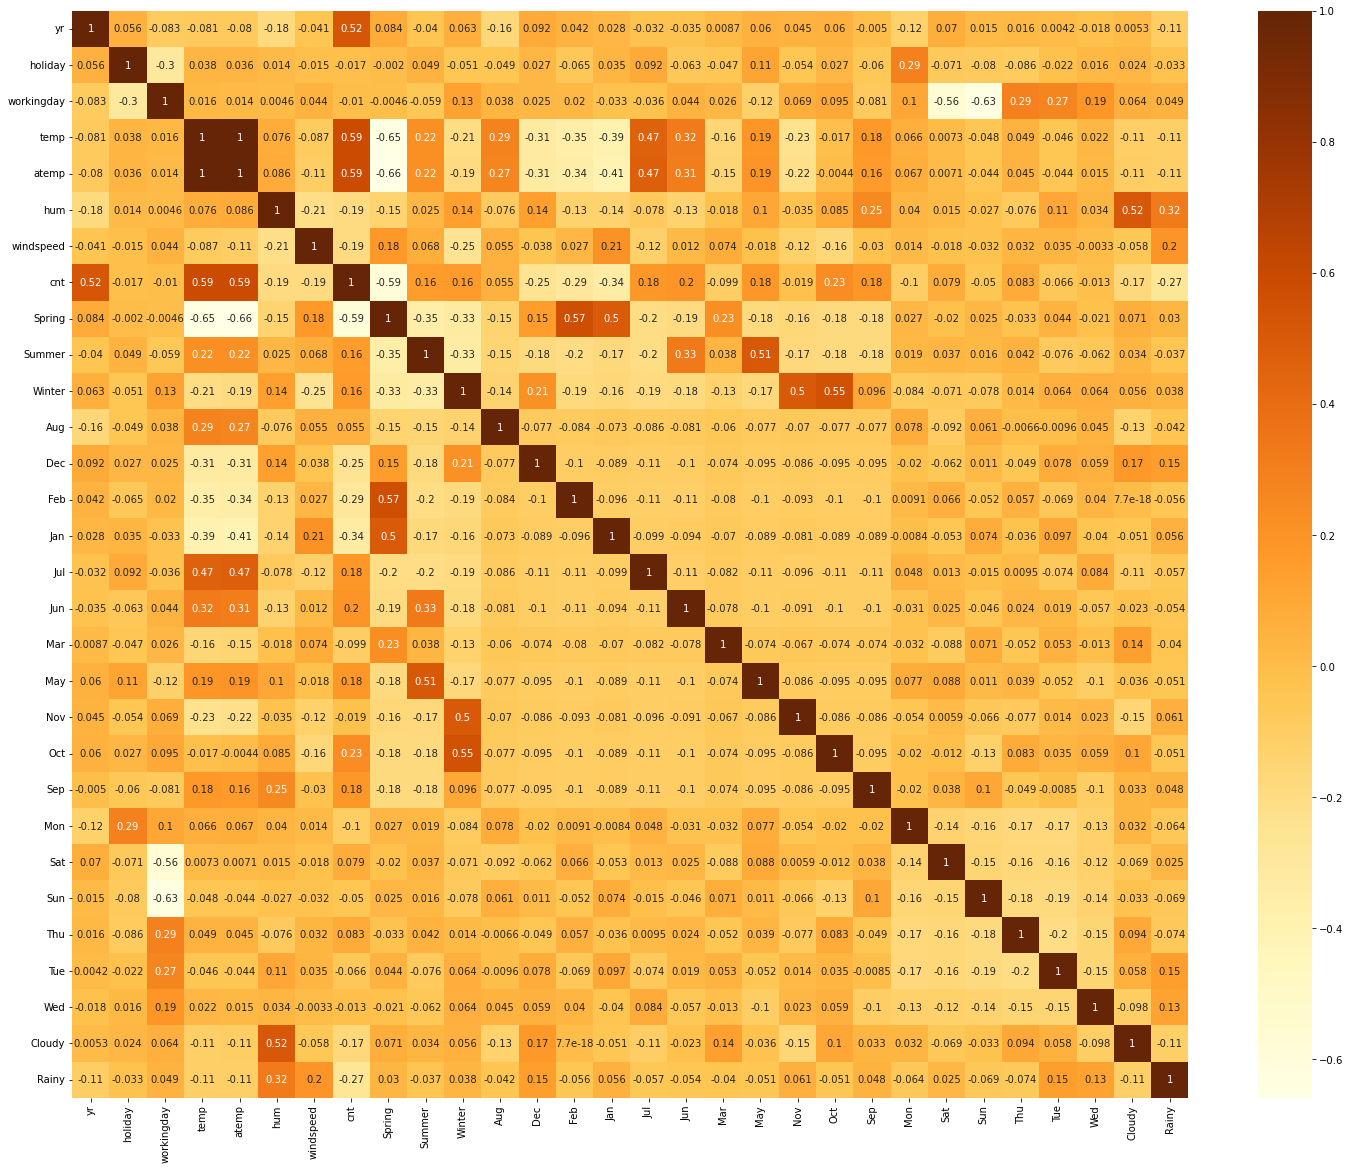

In [89]:
plt.figure(figsize=(25,20))
sns.heatmap(df_test.corr(),annot=True, cmap="YlOrBr")
plt.show()

89. **Dividing the y_test dataset**

In [90]:
y_test = df_test.pop('cnt')

90. **Dividing the X_test dataset and also here dropping the constant as it is not aligned with X_test from df_test**

In [91]:
X_test = df_test[X_train_sm.columns.drop('const')]

91. **Getting the top 5 rows of the X_test set**

In [92]:
X_test.head()

yr  workingday      temp  windspeed  Spring  Summer  Winter  Dec  Jan  \
184   0           0  0.831783   0.084218       0       0       0    0    0   
535   1           1  0.901355   0.153727       0       1       0    0    0   
299   0           1  0.511965   0.334205       0       0       1    0    0   
221   0           1  0.881625   0.339570       0       0       0    0    0   
152   0           1  0.817247   0.537413       0       1       0    0    0   

     Jul  Nov  Sep  Sat  Cloudy  Rainy  
184    1    0    0    0       1      0  
535    0    0    0    0       0      0  
299    0    0    0    0       1      0  
221    0    0    0    0       0      0  
152    0    0    0    0       0      0

92. **Getting the shape of the y_test set**

In [93]:
y_test.shape

(220,)

93. **Getting the shape of the X_test set**

In [94]:
X_test.shape

(220, 15)

94. **Adding a constant to the X_test dataset and cheking the top 5 rows.**

In [95]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

const  yr  workingday      temp  windspeed  Spring  Summer  Winter  Dec  \
184    1.0   0           0  0.831783   0.084218       0       0       0    0   
535    1.0   1           1  0.901355   0.153727       0       1       0    0   
299    1.0   0           1  0.511965   0.334205       0       0       1    0   
221    1.0   0           1  0.881625   0.339570       0       0       0    0   
152    1.0   0           1  0.817247   0.537413       0       1       0    0   

     Jan  Jul  Nov  Sep  Sat  Cloudy  Rainy  
184    0    1    0    0    0       1      0  
535    0    0    0    0    0       0      0  
299    0    0    0    0    0       1      0  
221    0    0    0    0    0       0      0  
152    0    0    0    0    0       0      0

95. **Predicting the y_test values using X_test_sm values.**

In [96]:
y_test_pred = lr_model.predict(X_test_sm)

96. **Getting the r2_score of the test dataset**

In [97]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8168680573708565

97. **Plotting a histogram of the error terms**

<AxesSubplot:ylabel='Density'>

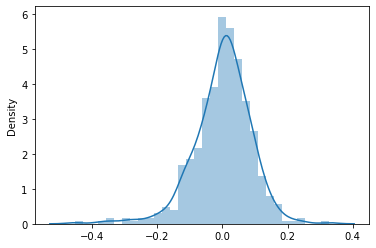

In [98]:
res = y_train-y_train_pred
sns.distplot(res)

98. **Plotting a scatterplot for predicted test dataset**

Text(0, 0.5, 'y-pred')

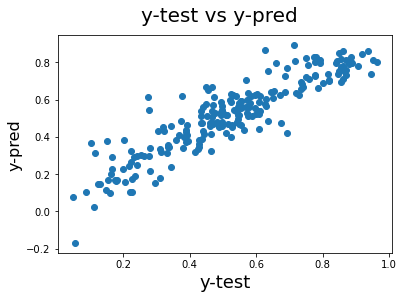

In [99]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y-test vs y-pred',fontsize=20)
plt.xlabel('y-test', fontsize=18)
plt.ylabel('y-pred', fontsize=16)

99. **We can see that the equation of our best fitted line is:**

*cnt = 0.234*yr + 0.054*workingday + 0.435*temp - 0.160*windspeed - 0.071*Spring + 0.0354*Summer + 0.0903*Winter - 0.046*Dec - 0.052*Jan - 0.046*Jul - 0.044*Nov + 0.065*Sep + 0.067*Sat - 0.081*Cloudy - 0.296*Rainy + 0.198*

In [114]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Mon, 18 Jul 2022   Prob (F-statistic):          1.84e-188
Time:                        11:26:34   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1985      0.033      6.031      0.000       0.134       0.263
yr             0.2348      0.008     29.173      0.000       0.219       0.251
workingday     0.0547      0.011      5.009      0.000       0.033       0.076
temp           0.4354      0.036     12.191      0.000       0.365       0.506
windspeed     -0.1609      0.025     -6.464      0.000      -0.210      -0.112
Spring        -0.0713      0.021     -3.371      0.001      -0.113      -0.030
Summer         0.0354      0.015      2.320      0.021       0.005       0.065
Winter         0.0903      0.018      5.093      0.000       0.055       0.125
Dec           -0.0467      0.017     -2.675      0.008      -0.081      -0.012
Jan           -0.0526      0.018     -2.905      0.004      -0.088      -0.017
Jul           -0.0466      0.018     -2.554      0.011      -0.082      -0.011
Nov           -0.0447      0.019     -2.389      0.017      -0.081      -0.008
Sep            0.0652      0.017      3.880      0.000       0.032       0.098
Sat            0.0670      0.014      4.758      0.000       0.039       0.095
Cloudy        -0.0818      0.009     -9.526      0.000      -0.099      -0.065
Rainy         -0.2969      0.024    -12.222      0.000      -0.345      -0.249
==============================================================================
Omnibus:                       85.035   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.572
Skew:                          -0.805   Prob(JB):                     9.50e-53
Kurtosis:                       5.946   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""